#### Cluster Analysis 2013 season

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.cm as cm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pylab import hist, show
import scipy
import zipfile
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import seaborn as sn
from sklearn.metrics import silhouette_samples, silhouette_score


sys.setrecursionlimit(100000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

In [2]:
pwd

'/Users/stefanostselios/Desktop/nhl_roster_design-master'

### import 2013 data

In [3]:
da = pd.read_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/stats/2013_player_stats.csv')
#da = pd.read_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/stats/2013_player_stats.csv')
da = da.drop('Unnamed: 0', axis=1)

In [4]:
da.shape

(1056, 48)

# Forwards

In [5]:
dfs = da.copy()
dfs = dfs[(dfs['Position'] != 'D') & (dfs['Position'] != 'G') ]
dfs = dfs.sort_values(['TPoints'], ascending=[False])
dfs.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
267,2013,PIT,SIDNEY CROSBY,C,80,36.0,68.0,104.0,133.0,62.0,77.0,60.0,17.0,224.0,1132,699,433,741,664,77,27.0,47.0,46.0,41.0,56.0,85.0,1758.0,0.020478,0.038680,0.059158,0.075654,0.035267,0.043800,0.034130,0.009670,0.127418,0.643914,0.397611,0.246303,0.421502,0.377702,0.043800,0.015358,0.026735,0.026166,0.023322,0.031854,0.048350
178,2013,ANA,RYAN GETZLAF,C,77,31.0,56.0,87.0,107.0,60.0,76.0,46.0,30.0,174.0,867,694,173,614,556,58,87.0,110.0,29.0,53.0,76.0,83.0,1639.0,0.018914,0.034167,0.053081,0.065284,0.036608,0.046370,0.028066,0.018304,0.106162,0.528981,0.423429,0.105552,0.374619,0.339231,0.035387,0.053081,0.067114,0.017694,0.032337,0.046370,0.050641
115,2013,PHI,CLAUDE GIROUX,C,82,28.0,58.0,86.0,110.0,67.0,65.0,57.0,8.0,195.0,1013,741,272,696,691,5,45.0,90.0,46.0,43.0,34.0,88.0,1676.0,0.016706,0.034606,0.051313,0.065632,0.039976,0.038783,0.034010,0.004773,0.116348,0.604415,0.442124,0.162291,0.415274,0.412291,0.002983,0.026850,0.053699,0.027446,0.025656,0.020286,0.052506
384,2013,DAL,TYLER SEGUIN,C,80,37.0,47.0,84.0,104.0,50.0,71.0,50.0,21.0,257.0,986,667,319,680,663,17,23.0,48.0,18.0,67.0,60.0,123.0,1548.0,0.023902,0.030362,0.054264,0.067183,0.032300,0.045866,0.032300,0.013566,0.166021,0.636951,0.430879,0.206072,0.439276,0.428295,0.010982,0.014858,0.031008,0.011628,0.043282,0.038760,0.079457
179,2013,ANA,COREY PERRY,W,81,43.0,39.0,82.0,111.0,51.0,79.0,45.0,34.0,234.0,934,598,336,675,564,111,27.0,81.0,61.0,31.0,56.0,121.0,1578.0,0.027250,0.024715,0.051965,0.070342,0.032319,0.050063,0.028517,0.021546,0.148289,0.591888,0.378961,0.212928,0.427757,0.357414,0.070342,0.017110,0.051331,0.038657,0.019645,0.035488,0.076679


In [6]:
dfs.shape

(628, 48)

### forwards time on ice distribution 

 - The purpose of plotting a histogram, is to view the distribution of games played by all skaters. Players that have played a substainial amount of few minutes are excluded by the data set.

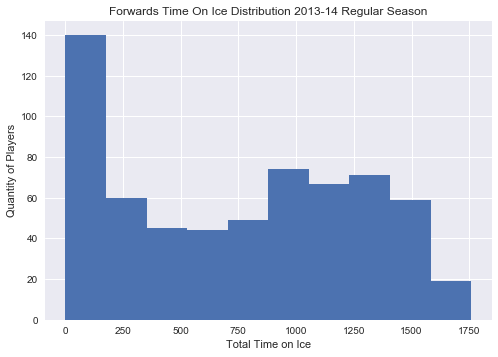

In [7]:
x2 = dfs.TTOI 
plt.title('Forwards Time On Ice Distribution 2013-14 Regular Season')
plt.xlabel('Total Time on Ice')
plt.ylabel('Quantity of Players')
#plt.xlim(170,180)
plt.hist(x2)
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_forwards_toi.pdf')
plt.show()

- Players that have played less than 180 minutes for the season are excluded from the cluster analysis. Since game level data is being used, those players will be ranked as 4th line players.

In [8]:
low = dfs.copy()
low = low[low['TTOI'] < 180]
low.shape

(140, 48)

In [9]:
low['Position'].value_counts()

W    77
C    63
Name: Position, dtype: int64

In [10]:
dfs = dfs[dfs['TTOI'] > 180]
dfs.shape

(487, 48)

In [11]:
#dfs.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/total_stats_forwards_nhl_positions.csv', index='False', sep=',')
#dfs.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/total_stats_forwards_nhl_positions.csv', index='False', sep=',')

## cluster for centers

In [12]:
dc = dfs.copy()
dc = dc[dc['Position'] == 'C']
dc.shape

(208, 48)

### standardization

- It is important to standardize the data so that we can effectively compare player performance. 
- Scale on-ice events per minute for each player relative to the league's season minimum and maximumn performance. All on-ice events per minute will have values between 0 and 1. 
- This technique makes sure that no particular event is being overweighted.

In [13]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
c = dc[['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties']]
c_scaled = scaler.fit_transform(c)

### dendrogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features.

In [14]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [15]:
sn.clustermap(c_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

- Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion".

In [16]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++', max_iter=1000, random_state=711)
  clusters.fit(c_scaled)
  cluster_errors.append(clusters.inertia_)

In [17]:
clusters_dc = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dc[0:10]

,cluster_errors,num_clusters
0,1664.000000,1
1,1186.271034,2
2,993.603986,3
3,885.297954,4
4,821.864360,5
5,759.830859,6
6,717.798133,7
7,677.036267,8
8,635.218713,9
9,605.866582,10


In [18]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_centers_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dc.to_latex())
f.write(endtex)
f.close()

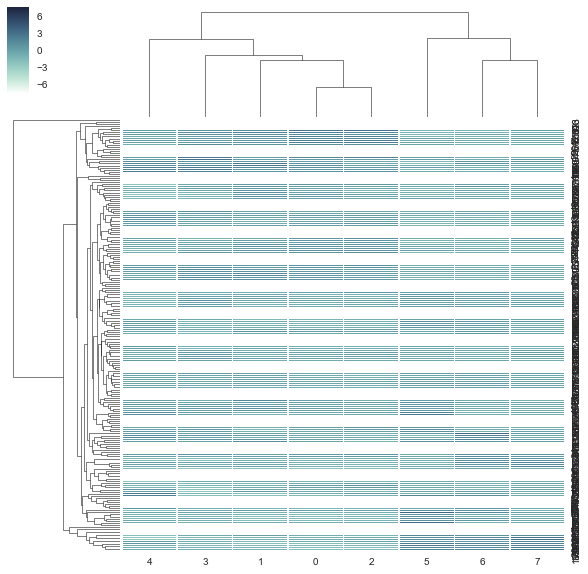

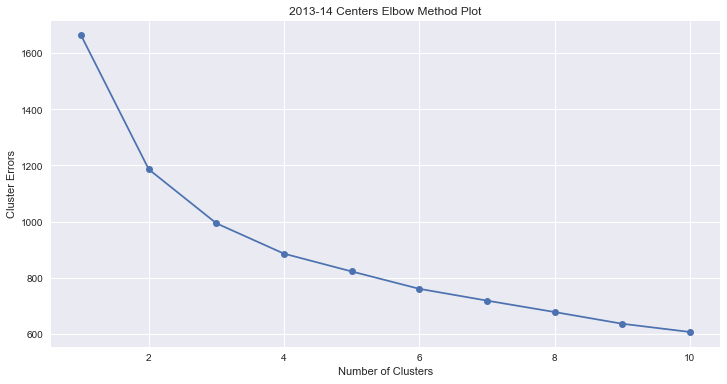

In [19]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dc.num_clusters, clusters_dc.cluster_errors, marker = "o" )
plt.title('2013-14 Centers Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_centers_eblow_plot.pdf')
plt.show()

### silhouette analysis

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

Silhouette score of an observation is given by:
\begin{equation}
s(i)=\frac{b(i)−a(i)}{max[a(i),b(i)]}
\end{equation}

From the above definition it is clear that silhoutte score always lies between:

\begin{equation}
−1≤s(i)≤1−1≤s(i)≤1
\end{equation}
Score closer to 1 means assigned to the cluster correctly and score closer to -1 is assigned to a wrong cluster. A score close to 0 means the point lies between almost at the boundary of both the clusters.

For n_clusters = 2 The average silhouette_score is : 0.243811084694
For n_clusters = 3 The average silhouette_score is : 0.240017969861
For n_clusters = 4 The average silhouette_score is : 0.15698433916
For n_clusters = 5 The average silhouette_score is : 0.151333522675
For n_clusters = 6 The average silhouette_score is : 0.147895321723
For n_clusters = 7 The average silhouette_score is : 0.143091793607
For n_clusters = 8 The average silhouette_score is : 0.151692006557
For n_clusters = 9 The average silhouette_score is : 0.135758481641
For n_clusters = 10 The average silhouette_score is : 0.150346834178


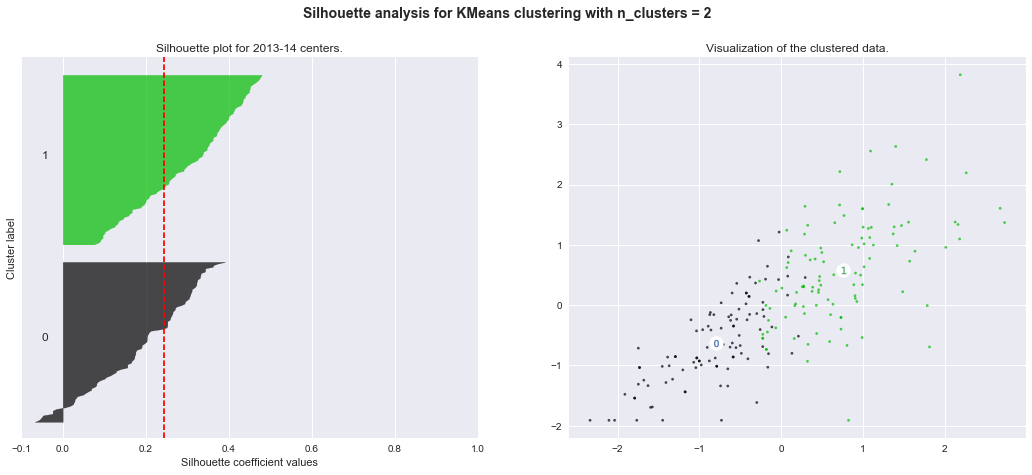

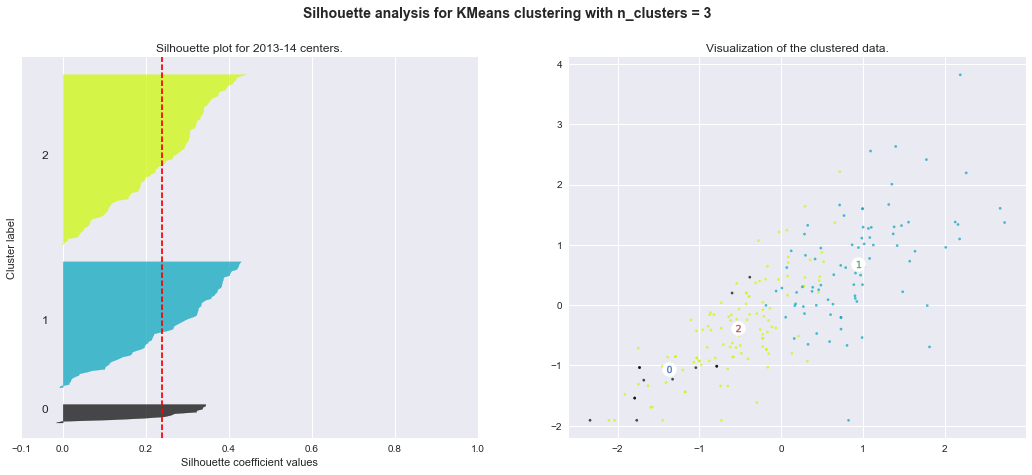

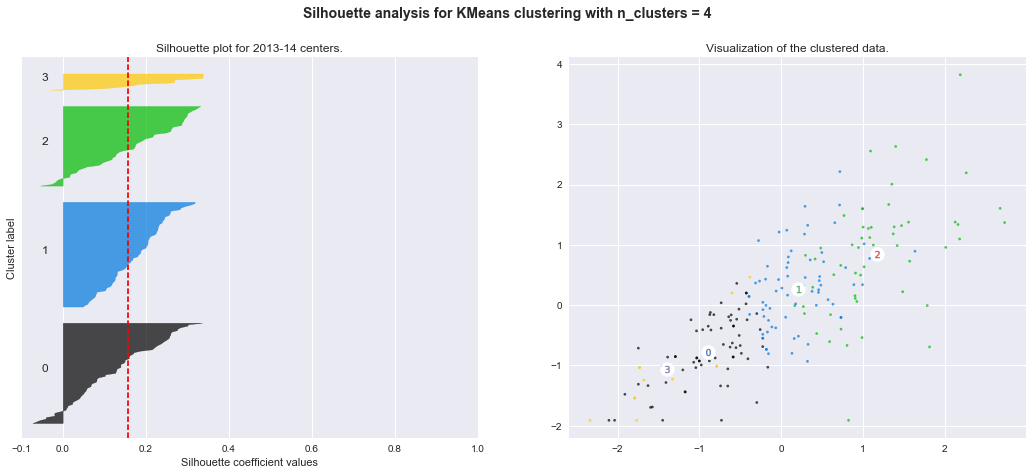

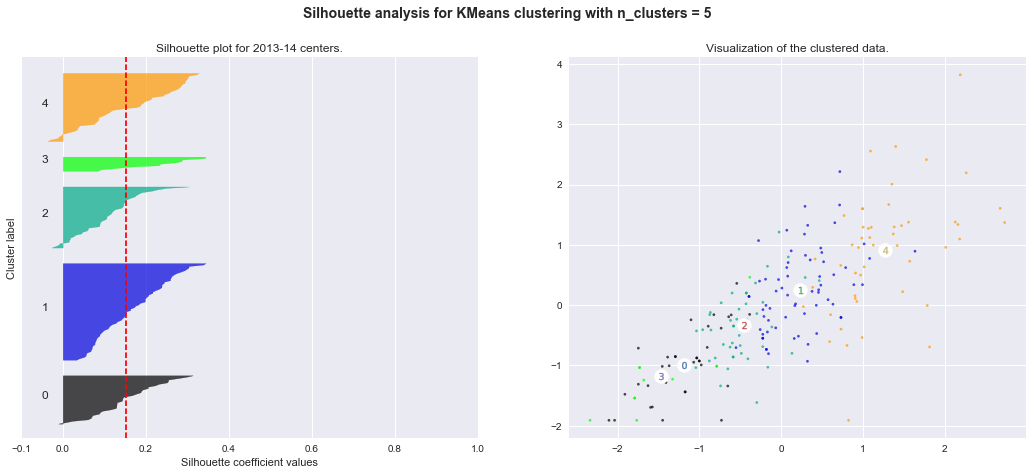

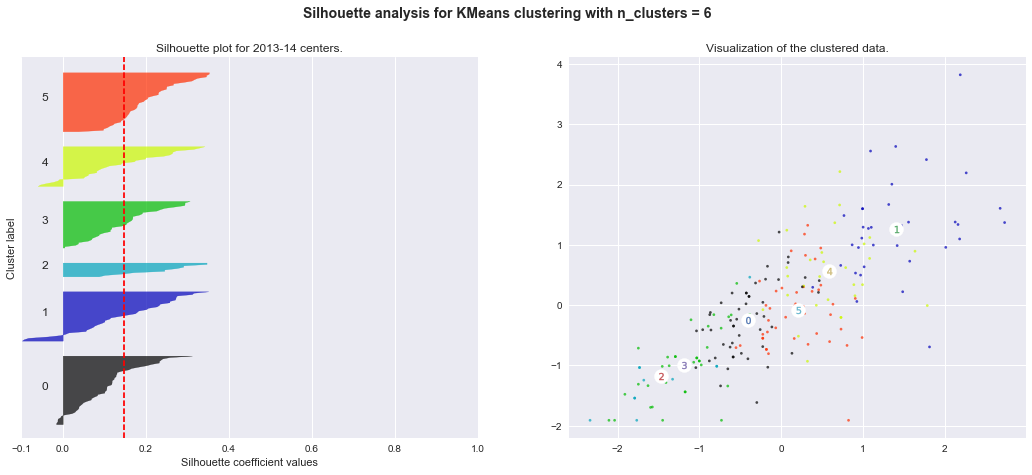

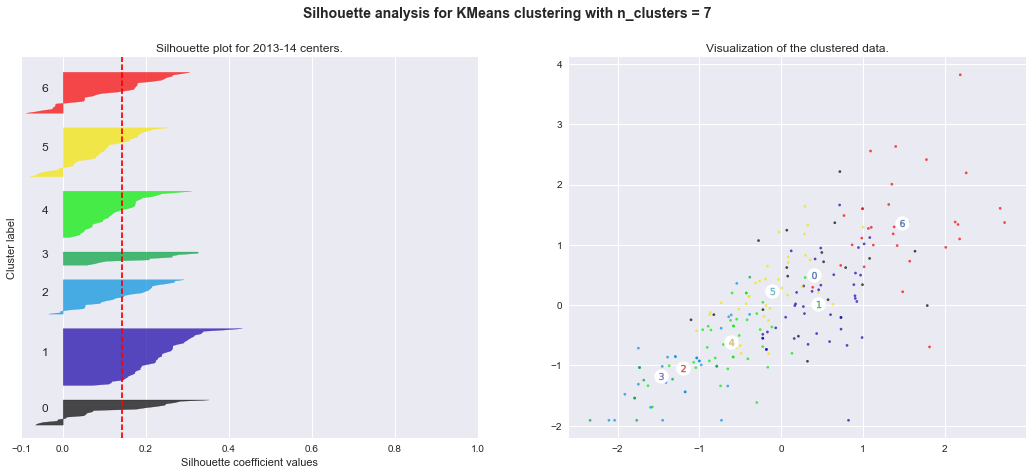

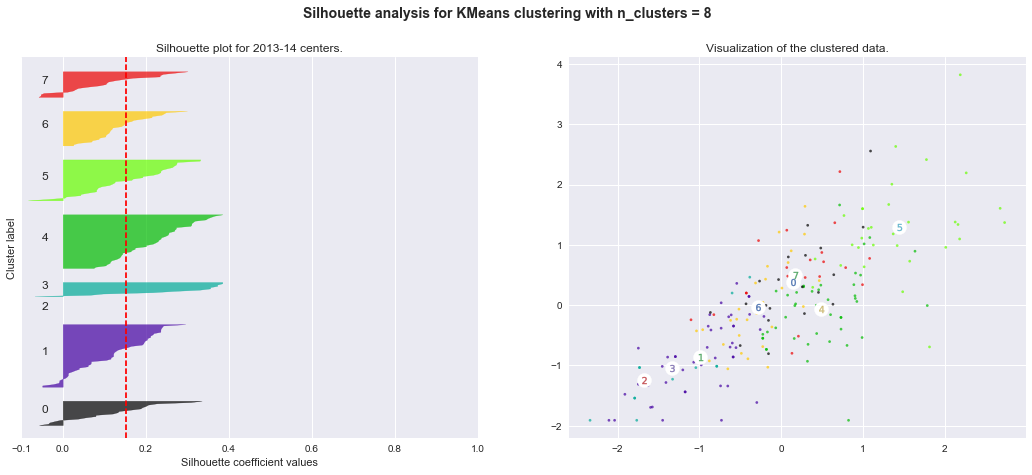

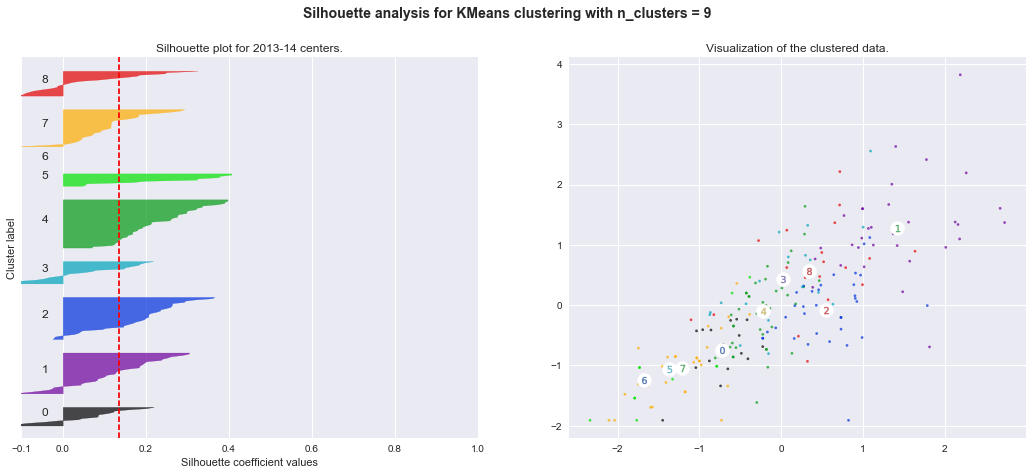

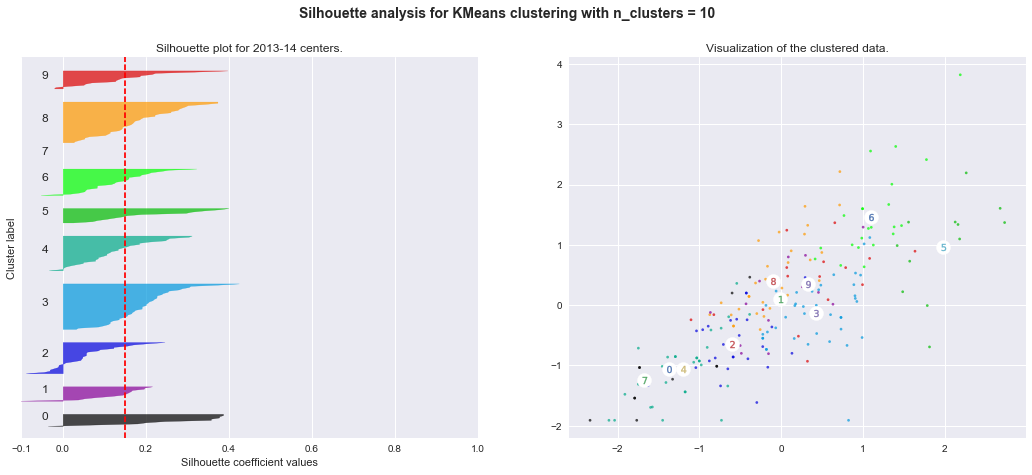

In [20]:
with PdfPages('test.pdf') as pdf:
    t = np.arange(0.0, 2.0, 0.01)
    s = 1 + np.sin(2*np.pi*t)
    s = s * 50

cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(c_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, random_state=711)
  cluster_labels = clusterer.fit_predict( c_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(c_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(c_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2013-14 centers.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(c_scaled[:, 0], c_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("Visualization of the clustered data.")
 

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_centers_silhouette_analysis.pdf')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=711)
kmeans.fit(c_scaled)

clusters_dc = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TOIPoints',  'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties'])

dc['cluster']=kmeans.labels_

clusters_dc

,TOIPoints,TOIGoals,TOIAssists,TOIPlus/Minus,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties
0,-0.901121,-0.772296,-0.752310,-0.520214,-0.091225,0.388399,0.237284,-0.070660
1,0.202715,0.275616,0.096369,-0.108908,-0.183406,-0.294376,-0.145757,-0.179536
2,1.169329,0.840780,1.091651,1.081636,0.637312,-0.437506,-0.565059,-0.329890
3,-1.394267,-1.066565,-1.255837,-1.312818,-1.296029,1.538197,2.100010,2.995503


In [22]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_centers_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dc.to_latex())
f.write(endtex)
f.close()

### rank centers

The next step is to rank players based on clusters:

- **Cluster 2** is for **1st** line (Top 3). 
- **Cluster 1** is for **2nd** second line (Top 6). 
- **Cluster 0** is for **3rd** third line (Top 9)
- **Cluster 3** is for **4th** fourth line (Bottom 3)

In [23]:
dc['Rank'] = dc.apply(lambda x: 1 if (x['cluster'] == 2) else 2 if (x['cluster'] == 1) else 3 if (x['cluster'] == 0) else 4, axis=1)
dc = dc.sort_values(['TPoints'], ascending=[False])
dc['Rank'].value_counts()

2    72
3    69
1    55
4    12
Name: Rank, dtype: int64

In [24]:
c = dc.copy()
c = c[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TOIPoints', 'TOIGoals', 'TOIAssists' , 'TOIShotsF', 'TOIShotsA', 'TOIEVDShots', 'TOIPlus/Minus', 'TOIGoalsF', 'TOIGoalsA', 'TOIBlocks', 'TOIHits', 'TTOI']]
c = c[c['Rank'] == 1]
c = c.sort_values(['TOIPoints', 'TPoints'], ascending=[False, False])
c.tail()

,Rank,TeamCode,PlayerName,TGP,TPoints,TOIPoints,TOIGoals,TOIAssists,TOIShotsF,TOIShotsA,TOIEVDShots,TOIPlus/Minus,TOIGoalsF,TOIGoalsA,TOIBlocks,TOIHits,TTOI
833,1,MIN,ERIK HAULA,46,15.0,0.032120,0.012848,0.019272,0.394004,0.460385,0.008565,0.029979,0.042827,0.021413,0.036403,0.049251,467.0
55,1,CHI,ANDREW SHAW,80,39.0,0.031076,0.015936,0.015139,0.615936,0.396016,0.076494,0.009562,0.066135,0.036653,0.012749,0.133865,1255.0
839,1,CGY,PAUL BYRON,47,21.0,0.030928,0.010309,0.020619,0.431517,0.407953,0.045655,0.011782,0.042710,0.030928,0.014728,0.092784,679.0
495,1,VAN,MIKE SANTORELLI,49,28.0,0.030769,0.010989,0.019780,0.501099,0.498901,0.036264,0.010989,0.042857,0.036264,0.048352,0.025275,910.0
255,1,N.J,TRAVIS ZAJAC,80,48.0,0.029538,0.011077,0.018462,0.478154,0.409846,0.060308,0.003692,0.049231,0.038769,0.015385,0.032615,1625.0


## clusters for wingers

In [25]:
dw = dfs.copy()
dw = dw[dw['Position'] == 'W']
dw.shape

(279, 48)

### standardization

- It is important to standardize the data so that we can effectively compare player performance. 
- Scale on-ice events per minute for each player relative to the league's season minimum and maximumn performance. All on-ice events per minute will have values between 0 and 1. 
- This technique makes sure that no particular event is being overweighted.

In [26]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
w = dw[['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties']]
w_scaled = scaler.fit_transform(w)

### dendrogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features.

In [27]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [28]:
sn.clustermap(w_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

- Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion".

In [29]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++', max_iter=1000, random_state=811)
  clusters.fit( w_scaled )
  cluster_errors.append( clusters.inertia_ )

In [30]:
clusters_dw = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dw[0:10]

,cluster_errors,num_clusters
0,2232.000000,1
1,1500.273912,2
2,1239.817016,3
3,1102.366178,4
4,1005.825656,5
5,941.571922,6
6,883.025782,7
7,843.305428,8
8,804.681807,9
9,759.059132,10


In [31]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_wingers_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dw.to_latex())
f.write(endtex)
f.close()

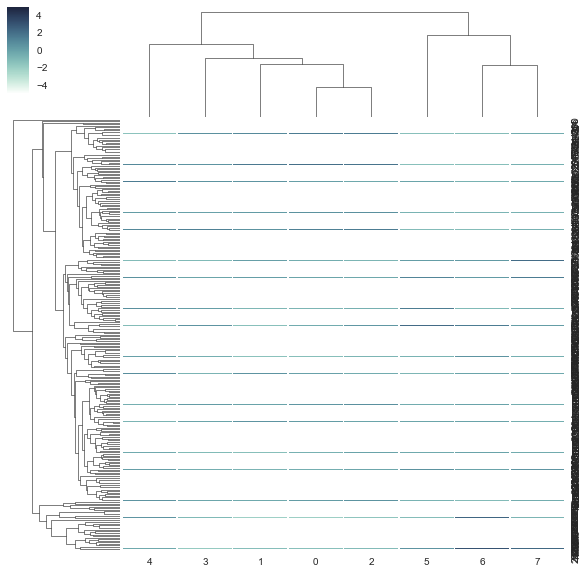

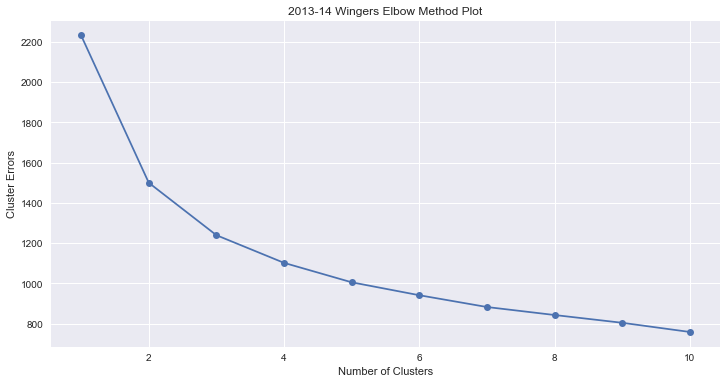

In [32]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dw.num_clusters, clusters_dw.cluster_errors, marker = "o" )
plt.title('2013-14 Wingers Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_wingers_eblow_plot.pdf')
plt.show()

### silhouette analysis

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

Silhouette score of an observation is given by:
\begin{equation}
s(i)=\frac{b(i)−a(i)}{max[a(i),b(i)]}
\end{equation}

From the above definition it is clear that silhoutte score always lies between:

\begin{equation}
−1≤s(i)≤1−1≤s(i)≤1
\end{equation}
Score closer to 1 means assigned to the cluster correctly and score closer to -1 is assigned to a wrong cluster. A score close to 0 means the point lies between almost at the boundary of both the clusters.

For n_clusters = 2 The average silhouette_score is : 0.279772555545
For n_clusters = 3 The average silhouette_score is : 0.244837146828
For n_clusters = 4 The average silhouette_score is : 0.179246615861
For n_clusters = 5 The average silhouette_score is : 0.181079882669
For n_clusters = 6 The average silhouette_score is : 0.170427594113
For n_clusters = 7 The average silhouette_score is : 0.174578250706
For n_clusters = 8 The average silhouette_score is : 0.17638874593
For n_clusters = 9 The average silhouette_score is : 0.157056763311
For n_clusters = 10 The average silhouette_score is : 0.164215828285


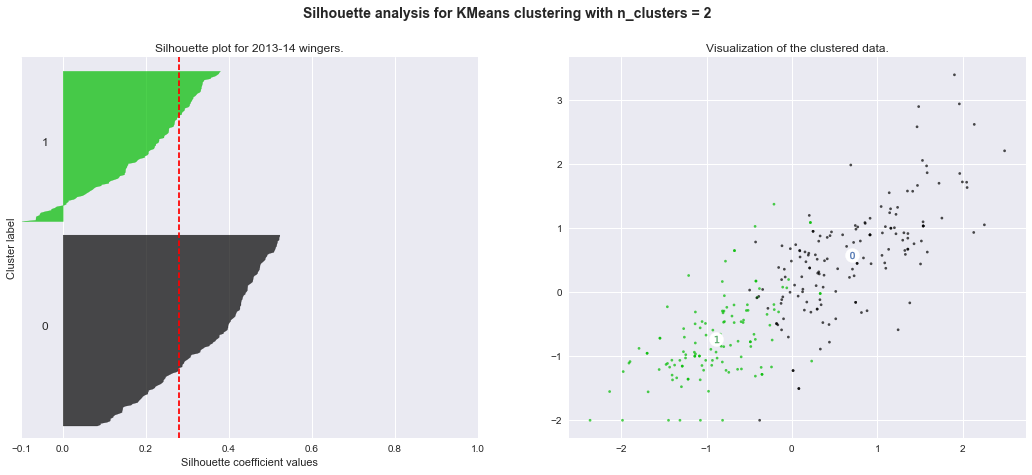

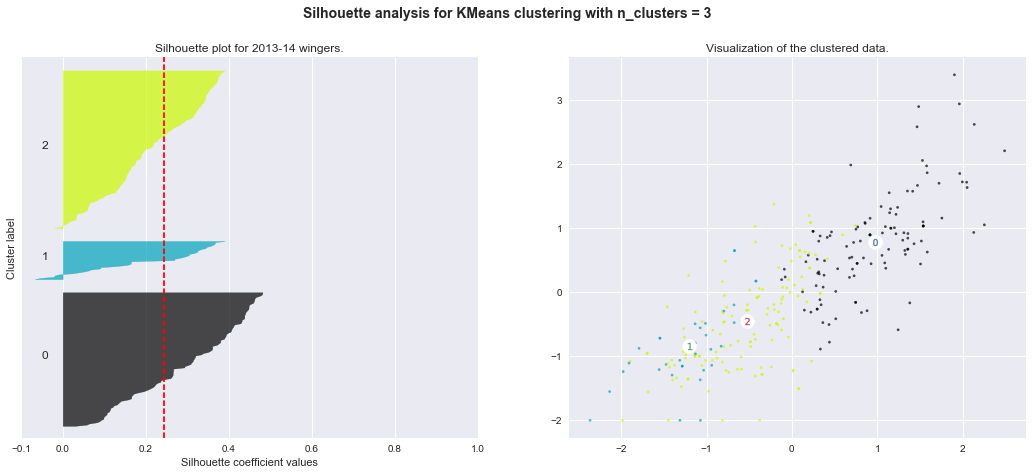

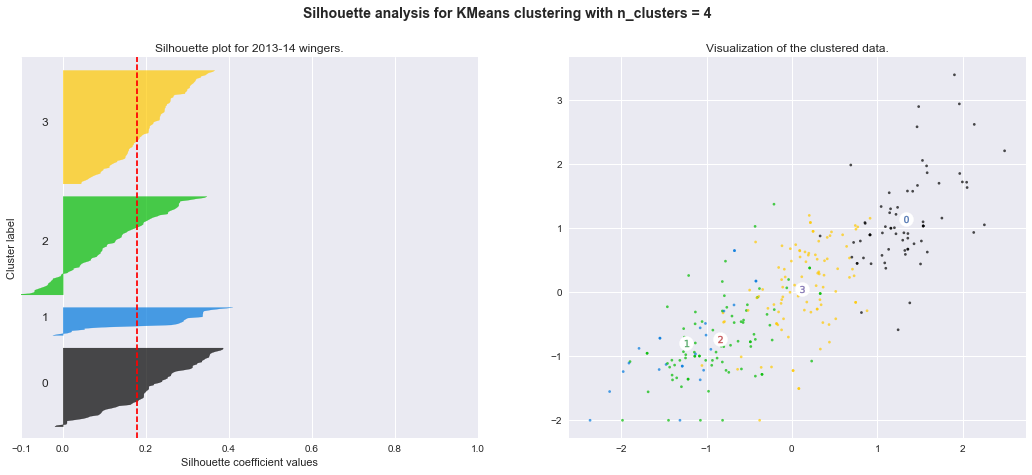

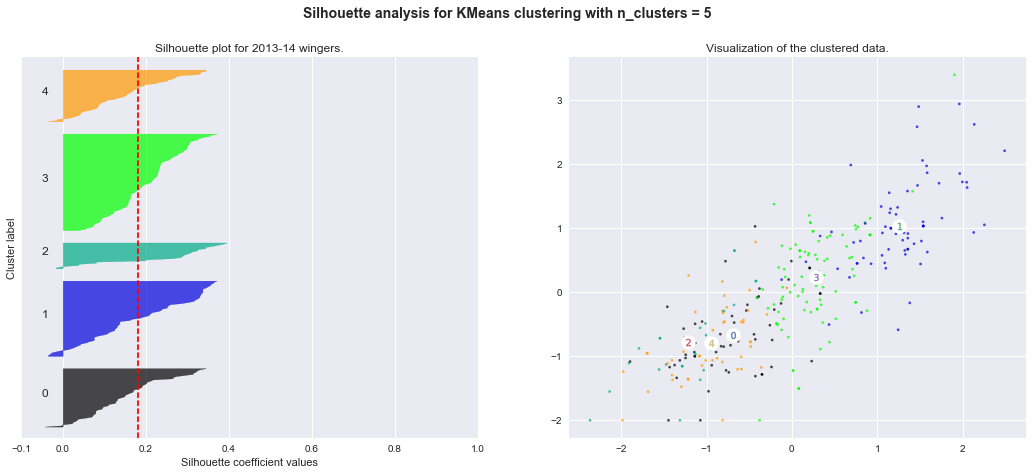

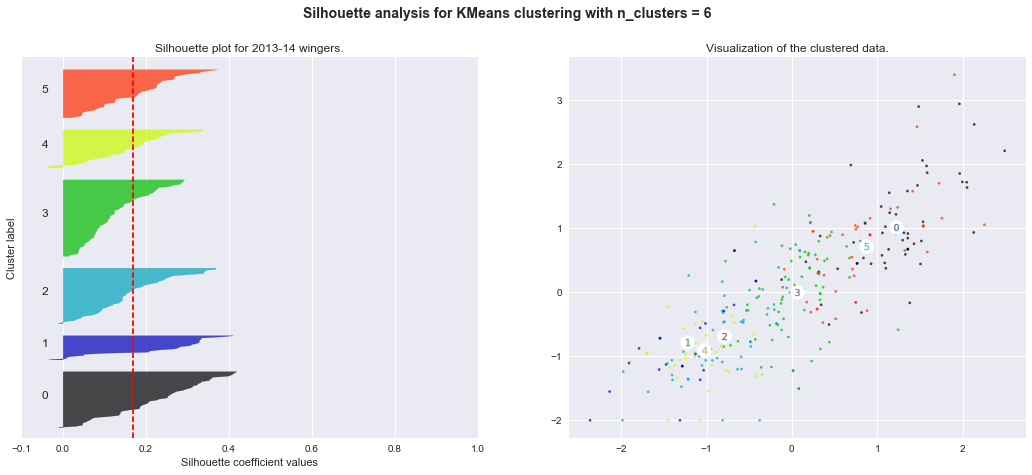

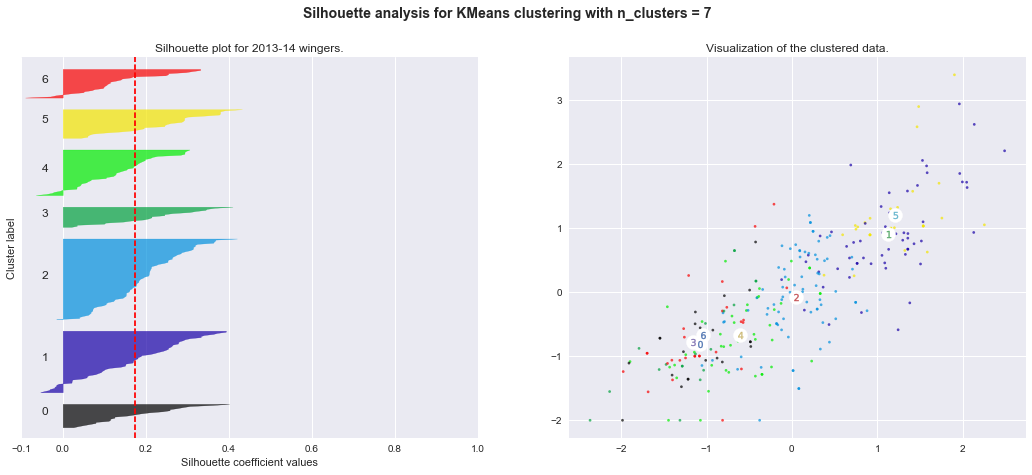

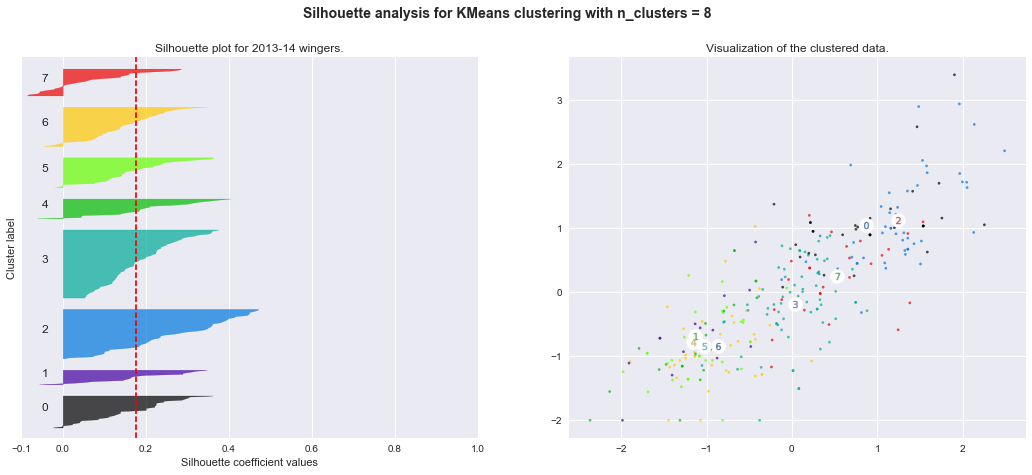

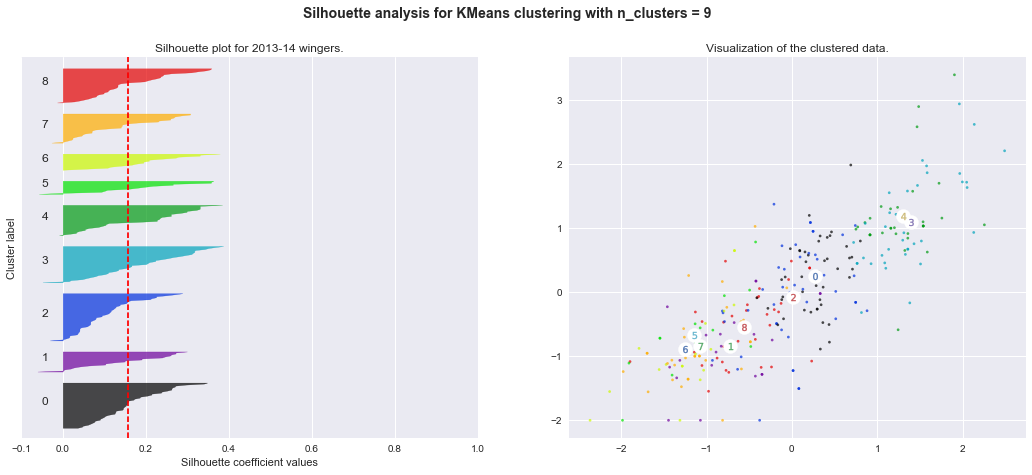

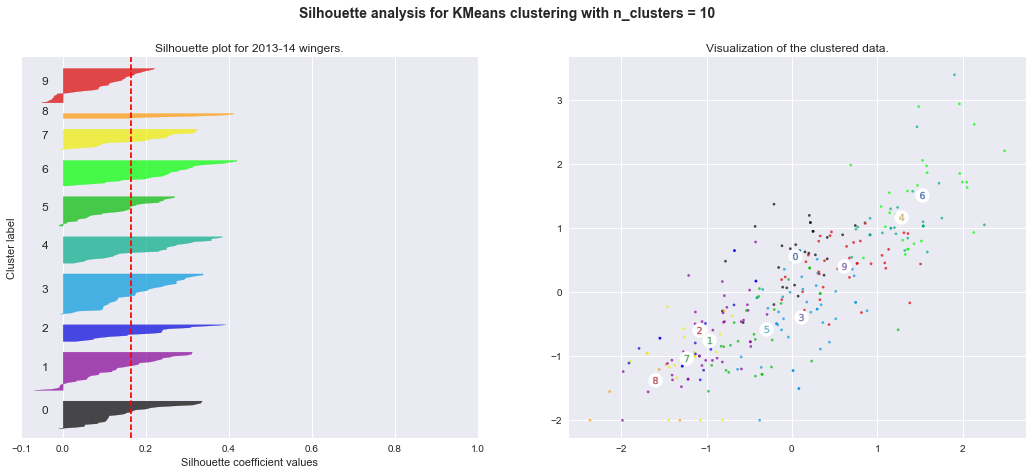

In [33]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(w_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, random_state=811)
  cluster_labels = clusterer.fit_predict( w_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(w_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(w_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2013-14 wingers.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(w_scaled[:, 0], w_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("Visualization of the clustered data.")
 

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

 
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_wingers_silhouette_analysis.pdf')
plt.show()

Silhouette analysis for KMeans clustering show that the number of clusters with the highest values of the eleven statistics used, are n = 2, 3, 4 with an average silhouette score of 0.294, 0.200, 0.196 respectfully.
<br>
This indicates that the most natural cluster size were within this range. From a hockey perspective, since there are 4 forward lines, the optimal number of clusters for centers, left and right wingers are 4. 

- Top Line
- Second Line
- Third Line
- Fourth Line

In [34]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=811)
kmeans.fit(w_scaled)

clusters_dw = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties'])

dw['cluster']=kmeans.labels_

clusters_dw

,TOIPoints,TOIGoals,TOIAssists,TOIPlus/Minus,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties
0,1.330026,1.140290,1.143262,0.997086,0.465396,-0.478499,-0.600771,-0.333435
1,-1.244479,-0.794730,-1.281899,-1.040707,-0.987602,0.090920,1.958316,2.548931
2,-0.839483,-0.737670,-0.707616,-0.539517,-0.327186,0.751568,0.355346,-0.087099
3,0.116523,0.046746,0.141590,0.036538,0.209249,-0.342338,-0.384490,-0.335614


In [35]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_wingers_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dw.to_latex())
f.write(endtex)
f.close()

The table shows the 4 clusters broken out into the variables we input into the model. Cluster 1 is the cluster of top-performing forwards. Remember, these numbers are scaled, so the number points per time on ice (MPoints) cluster 1 forwards is 0.55 standard deviations above the mean for all forwards.

In [36]:
#clusters_dw.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/clusters_wingers.csv')
#clusters_dw.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/clusters_wingers.csv')

### rank wingers

The next step is to rank players based on clusters:

- **Cluster 0** is for **1st** line (Top 3). 
- **Cluster 3** is for **2nd** second line (Top 6). 
- **Cluster 2** is for **3rd** third line (Top 9)
- **Cluster 1** is for **4th** fourth line (Bottom 3)

In [37]:
dw['Rank'] = dw.apply(lambda x: 1 if (x['cluster'] == 0) else 2 if (x['cluster'] == 3) else 3 if (x['cluster'] == 2) else 4, axis=1)
dw = dw.sort_values(['TPoints'], ascending=[False])
dw['Rank'].value_counts()

2    99
3    86
1    69
4    25
Name: Rank, dtype: int64

In [38]:
w2 = dw.copy()
w2 = w2[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TOIPoints', 'TOIGoals', 'TOIAssists' , 'TOIShotsF', 'TOIShotsA', 'TOIDShots', 'TOIPlus/Minus', 'TOIGoalsF', 'TOIGoalsA', 'TOIBlocks', 'TOIHits', 'TTOI']]
w2 = w2[w2['Rank'] == 1]
w2 = w2.sort_values(['TOIPoints', 'TPoints'], ascending=[False, False])
w2.head()

,Rank,TeamCode,PlayerName,TGP,TPoints,TOIPoints,TOIGoals,TOIAssists,TOIShotsF,TOIShotsA,TOIDShots,TOIPlus/Minus,TOIGoalsF,TOIGoalsA,TOIBlocks,TOIHits,TTOI
274,1,PIT,JAMES NEAL,59,61.0,0.056066,0.024816,0.031250,0.707721,0.398897,0.308824,0.011949,0.083640,0.034007,0.020221,0.053309,1088.0
77,1,EDM,TAYLOR HALL,75,80.0,0.053333,0.018000,0.035333,0.524667,0.493333,0.031333,-0.007333,0.063333,0.050000,0.026000,0.036000,1500.0
179,1,ANA,COREY PERRY,81,82.0,0.051965,0.027250,0.024715,0.591888,0.378961,0.212928,0.021546,0.070342,0.032319,0.017110,0.051331,1578.0
155,1,DET,HENRIK ZETTERBERG,45,48.0,0.051892,0.017297,0.034595,0.629189,0.444324,0.184865,0.020541,0.073514,0.035676,0.016216,0.024865,925.0
39,1,CHI,PATRICK KANE,69,69.0,0.050998,0.021434,0.029564,0.614930,0.399113,0.215817,0.005913,0.064302,0.034738,0.011086,0.011826,1353.0


# Defensemen

In [39]:
dwd = da.copy()
dwd = dwd[dwd['Position'] == 'D']
dwd = dwd.sort_values(['TGP', 'TTOI'], ascending=[True, True])
dwd.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
883,2013,WPG,JULIAN MELCHIORI,D,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,0,3,-3,0,3,-3,1.0,1.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0000,0.0000,0.000000,0.111111,0.000000,0.111111,-0.111111,0.0,0.000000,0.333333,-0.333333,0.000000,0.333333,-0.333333,0.111111,0.111111,0.000000,0.000000,0.111111,0.000000
767,2013,WPG,BEN CHIAROT,D,1,0.0,0.0,0.0,0.0,3.0,0.0,3.0,-3.0,0.0,2,7,-5,2,7,-5,0.0,3.0,0.0,1.0,0.0,0.0,11.0,0.0,0.0000,0.0000,0.000000,0.272727,0.000000,0.272727,-0.272727,0.0,0.181818,0.636364,-0.454545,0.181818,0.636364,-0.454545,0.000000,0.272727,0.000000,0.090909,0.000000,0.000000
1044,2013,TOR,PETTER GRANBERG,D,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6,-3,3,6,-3,1.0,3.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.500000,-0.250000,0.250000,0.500000,-0.250000,0.083333,0.250000,0.000000,0.000000,0.000000,0.083333
899,2013,DET,ALEXEY MARCHENKO,D,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,9,8,1,9,7,2,0.0,0.0,2.0,0.0,0.0,0.0,13.0,0.0,0.0000,0.0000,0.153846,0.000000,0.153846,0.000000,0.153846,0.0,0.692308,0.615385,0.076923,0.692308,0.538462,0.153846,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000
882,2013,DAL,MAXIME FORTUNUS,D,1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,5,9,-4,5,8,-3,1.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0,0.0625,0.0625,0.062500,0.000000,0.062500,0.000000,0.062500,0.0,0.312500,0.562500,-0.250000,0.312500,0.500000,-0.187500,0.062500,0.000000,0.000000,0.000000,0.000000,0.062500


In [40]:
dwd.shape

(319, 48)

## defensemen time on ice distribution

- time on ice distribution will determine the quantity of players to include in the cluster analysis. Players that have played a signficant low total of minutes will be excluded from clustering and assign directly to the bottom defensive pairing.

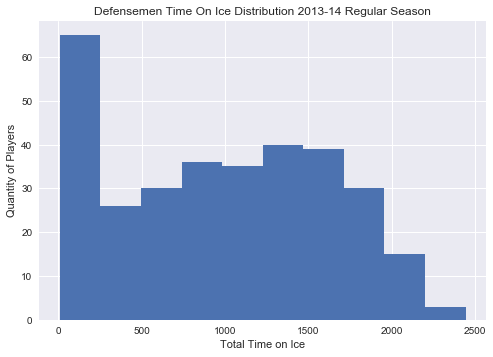

In [41]:
x3 = dwd.TTOI 
plt.title('Defensemen Time On Ice Distribution 2013-14 Regular Season')
plt.xlabel('Total Time on Ice')
plt.ylabel('Quantity of Players')
#plt.xlim(240,260)
plt.hist(x3)
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_defensemen_toi.pdf')
plt.show()

- Defensemen that have played less than 254 minutes for the season are excluded from the cluster analysis. Since game level data is being used, those players will be ranked as 3rd pairing defensemen.

In [42]:
low = dwd.copy()
low = low[low['TTOI'] < 254]
low.shape

(65, 48)

In [43]:
dwd = dwd[dwd['TTOI'] > 254]
dwd.shape

(253, 48)

In [44]:
dwd.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
651,2013,FLA,MATT GILROY,D,16,1.0,1.0,2.0,8.0,9.0,8.0,9.0,-1.0,26.0,116,120,-4,109,118,-9,18.0,5.0,6.0,1.0,10.0,14.0,260.0,0.003846,0.003846,0.007692,0.030769,0.034615,0.030769,0.034615,-0.003846,0.100000,0.446154,0.461538,-0.015385,0.419231,0.453846,-0.034615,0.069231,0.019231,0.023077,0.003846,0.038462,0.053846
1001,2013,FLA,COLBY ROBAK,D,16,0.0,2.0,2.0,8.0,16.0,7.0,11.0,-4.0,15.0,131,164,-33,123,123,0,19.0,17.0,6.0,4.0,4.0,3.0,297.0,0.000000,0.006734,0.006734,0.026936,0.053872,0.023569,0.037037,-0.013468,0.050505,0.441077,0.552189,-0.111111,0.414141,0.414141,0.000000,0.063973,0.057239,0.020202,0.013468,0.013468,0.010101
995,2013,EDM,OSCAR KLEFBOM,D,17,1.0,2.0,3.0,9.0,15.0,9.0,15.0,-6.0,13.0,117,140,-23,114,128,-14,24.0,6.0,0.0,3.0,9.0,6.0,269.0,0.003717,0.007435,0.011152,0.033457,0.055762,0.033457,0.055762,-0.022305,0.048327,0.434944,0.520446,-0.085502,0.423792,0.475836,-0.052045,0.089219,0.022305,0.000000,0.011152,0.033457,0.022305
981,2013,PHX,CHRIS SUMMERS,D,18,2.0,1.0,3.0,6.0,11.0,6.0,6.0,0.0,15.0,88,157,-69,88,122,-34,25.0,33.0,15.0,0.0,4.0,4.0,269.0,0.007435,0.003717,0.011152,0.022305,0.040892,0.022305,0.022305,0.000000,0.055762,0.327138,0.583643,-0.256506,0.327138,0.453532,-0.126394,0.092937,0.122677,0.055762,0.000000,0.014870,0.014870
802,2013,WSH,TYSON STRACHAN,D,18,0.0,2.0,2.0,6.0,12.0,6.0,8.0,-2.0,7.0,97,176,-79,96,158,-62,30.0,31.0,28.0,4.0,9.0,9.0,312.0,0.000000,0.006410,0.006410,0.019231,0.038462,0.019231,0.025641,-0.006410,0.022436,0.310897,0.564103,-0.253205,0.307692,0.506410,-0.198718,0.096154,0.099359,0.089744,0.012821,0.028846,0.028846


## clusters for defensemen

In [45]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
d = dwd[['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties']]
d_scaled = scaler.fit_transform(d)

### dendrogram

In [46]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [47]:
sn.clustermap(d_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

In [48]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++', max_iter=1000, random_state=907)
  clusters.fit(d_scaled)
  cluster_errors.append(clusters.inertia_)

In [49]:
clusters_dwd = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dwd[0:10]

,cluster_errors,num_clusters
0,2024.000000,1
1,1492.076527,2
2,1263.089216,3
3,1124.514328,4
4,1035.380309,5
5,969.370493,6
6,908.989982,7
7,866.819029,8
8,826.127411,9
9,802.038492,10


In [50]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_defensemen_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dwd.to_latex())
f.write(endtex)
f.close()

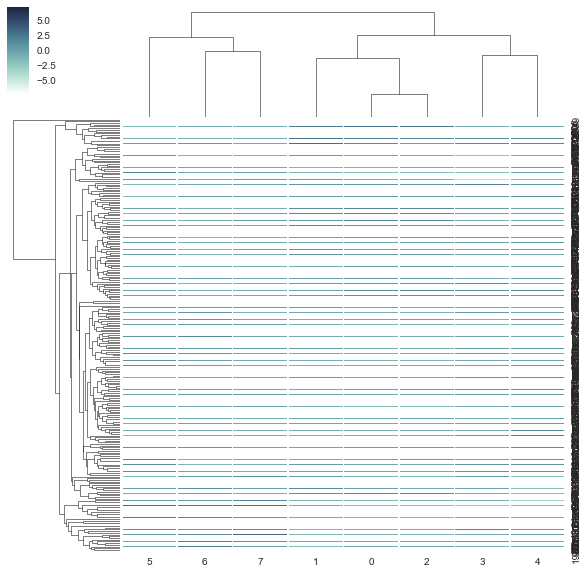

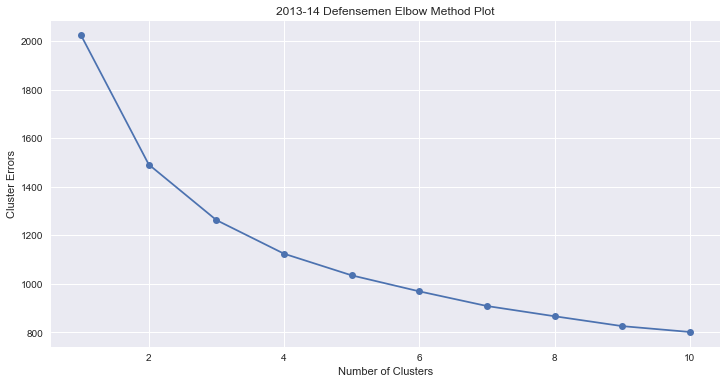

In [51]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dwd.num_clusters, clusters_dwd.cluster_errors, marker = "o" )
plt.title('2013-14 Defensemen Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_defensemen_eblow_plot.pdf')
plt.show()

### silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.225701503866
For n_clusters = 3 The average silhouette_score is : 0.194297939037
For n_clusters = 4 The average silhouette_score is : 0.175960889503
For n_clusters = 5 The average silhouette_score is : 0.153428727044
For n_clusters = 6 The average silhouette_score is : 0.165346090958
For n_clusters = 7 The average silhouette_score is : 0.153705360558
For n_clusters = 8 The average silhouette_score is : 0.144329273488
For n_clusters = 9 The average silhouette_score is : 0.14548654454
For n_clusters = 10 The average silhouette_score is : 0.141832391867


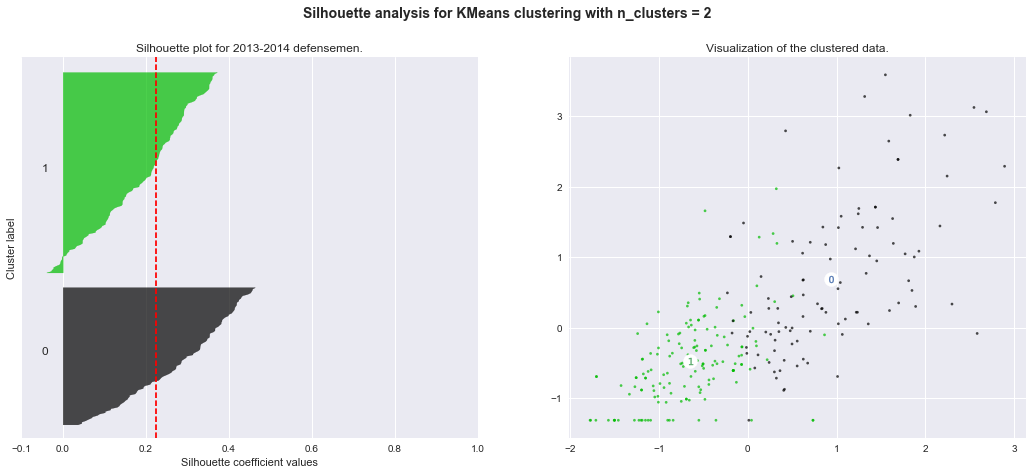

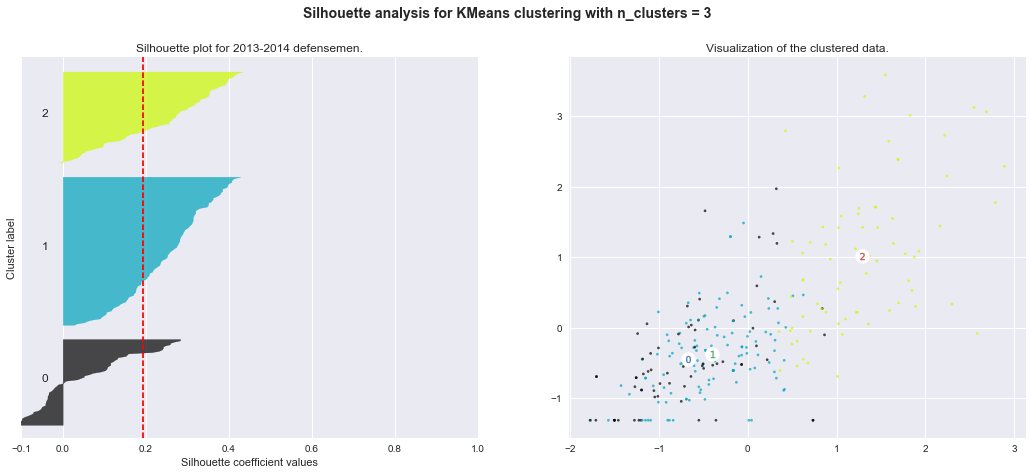

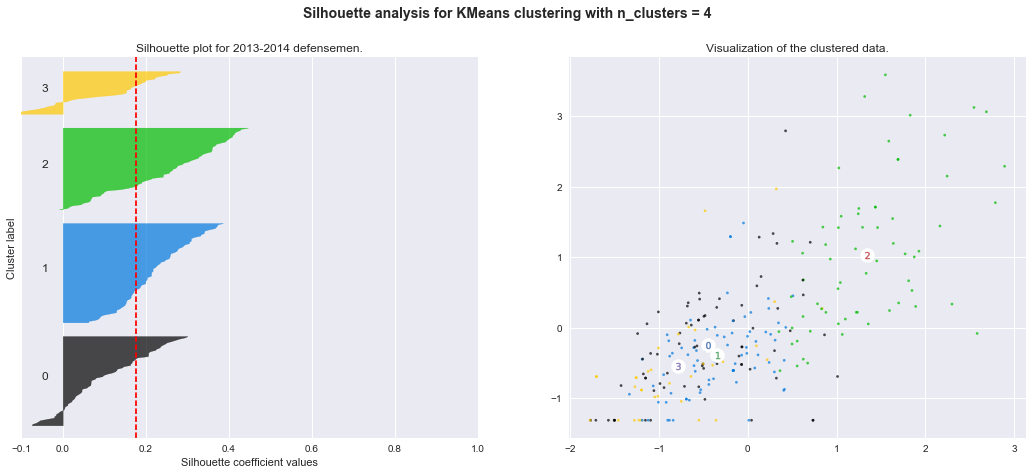

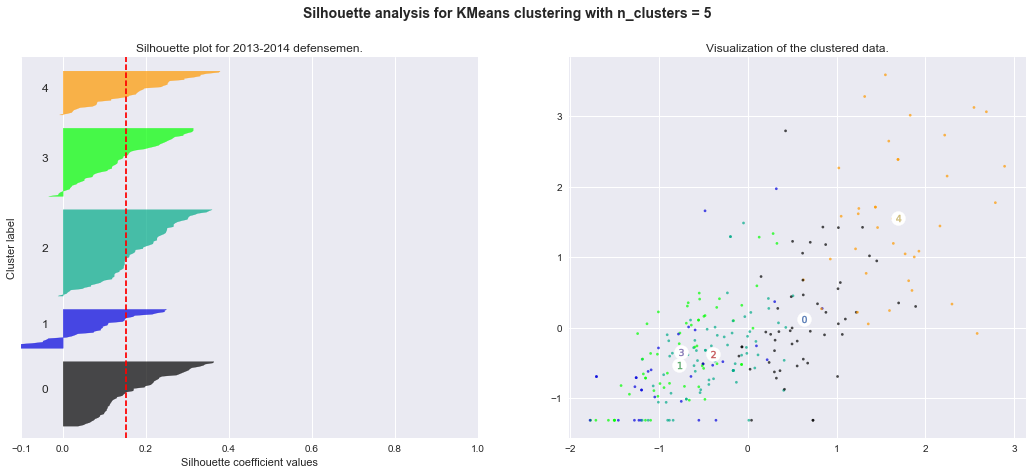

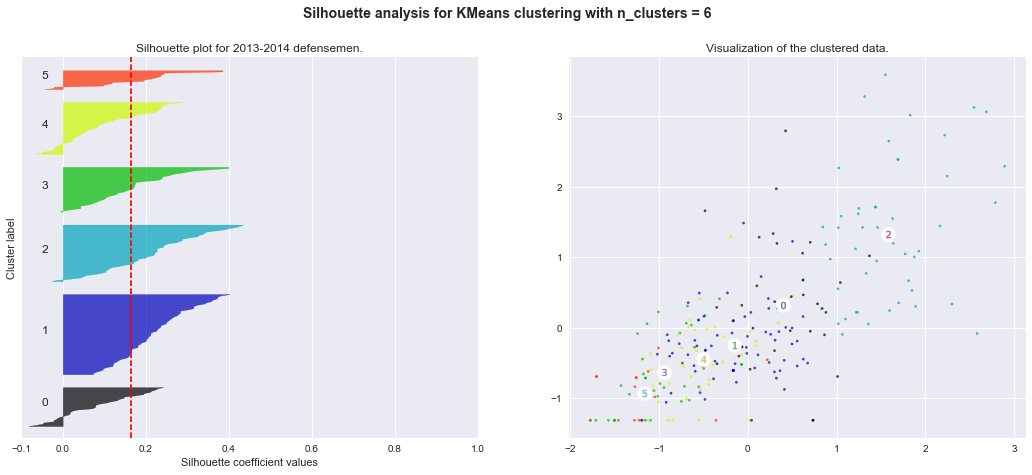

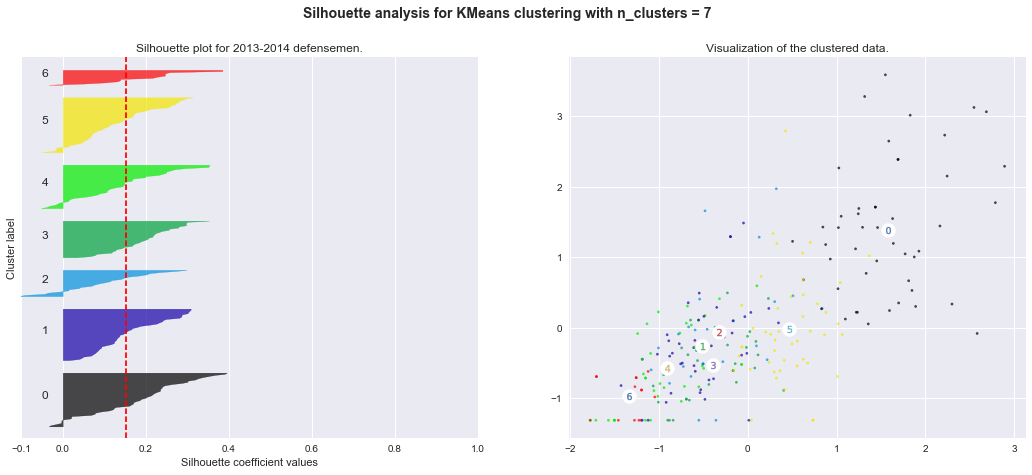

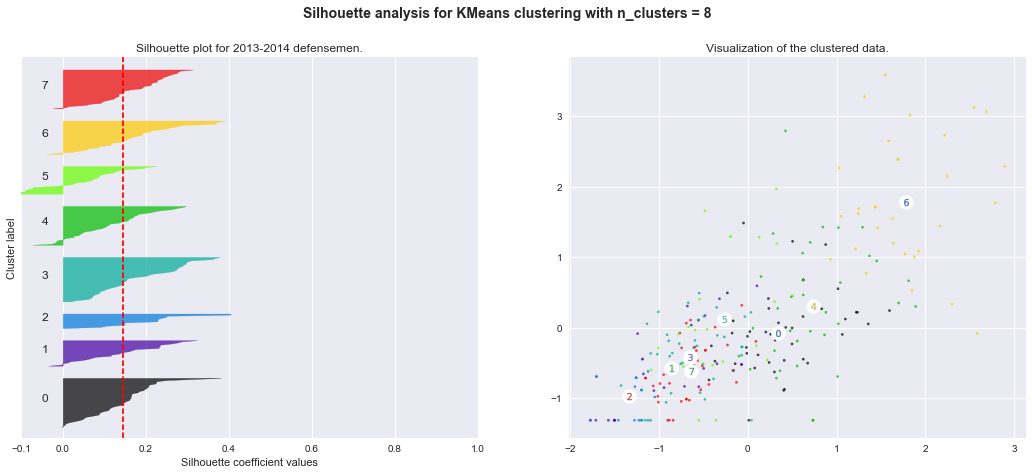

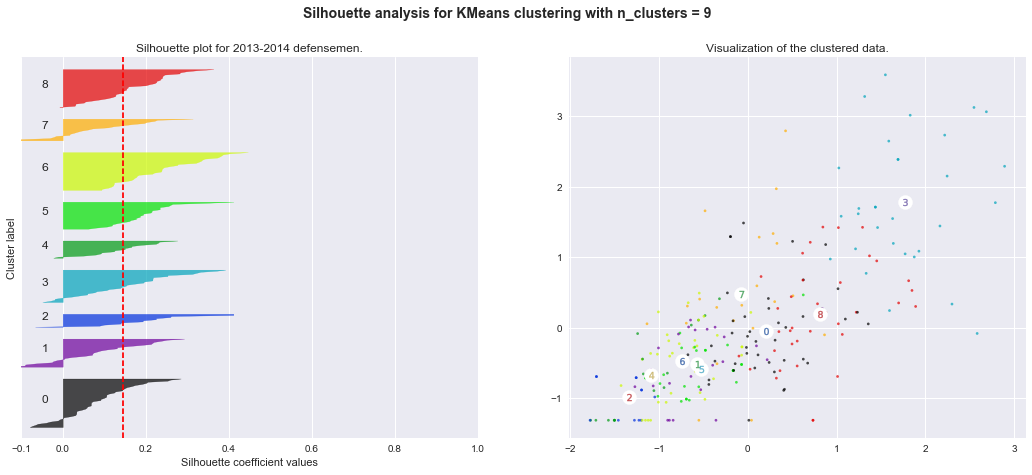

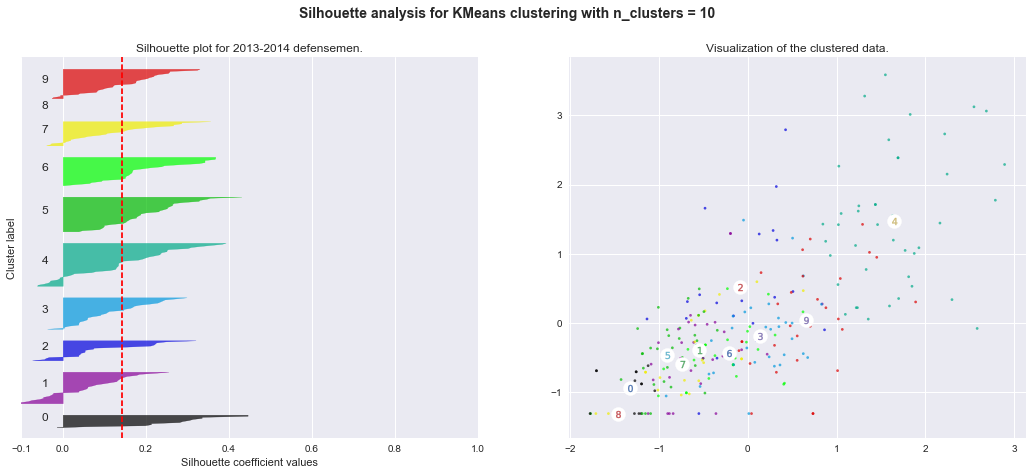

In [52]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(d_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, random_state=907)
  cluster_labels = clusterer.fit_predict( d_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(d_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(d_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2013-2014 defensemen.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(d_scaled[:, 0], d_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("Visualization of the clustered data.")


  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_defensemen_silhouette_analysis.pdf')
plt.show()

Silhouette analysis for KMeans clustering of defensemen shows that the number of clusters with the highest values of the eleven statistics used, are $n$ = 2, 3, 4. These clusters have an average silhouette score of 0.249, 0.173 and 0.141 respectfully. 
This indicates that the most natural cluster size were within this range. From a hockey perspective, since there are 3 defensive pairings, the optimal number of clusters for left and right defensemen are 3. 
- Top Two Defensive Pairing (LD, RD)
- Top Four Defensive Pairing (LD, RD)
- Bottom Defensive Pairing (LD, RD)


In [53]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=1000, random_state=907)
kmeans.fit(d_scaled)

clusters_dwd = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties'])

dwd['cluster']=kmeans.labels_

clusters_dwd

,TOIPoints,TOIGoals,TOIAssists,TOIPlus/Minus,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties
0,-0.668680,-0.437155,-0.652904,-0.690326,-0.891514,0.732918,0.914433,0.964080
1,-0.405807,-0.370981,-0.344005,0.188265,0.412739,-0.018728,-0.203884,-0.307060
2,1.288301,1.013412,1.173312,0.346499,0.172767,-0.661293,-0.532680,-0.412414


In [54]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_defensemen_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dwd.to_latex())
f.write(endtex)
f.close()

In [55]:
#clusters_dwd.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/clusters_defensemen.csv')
#clusters_dwd.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/clusters_defensemen.csv')

The table shows the 3 clusters broken out into the variables we input into the model. Cluster 1 is the cluster of top-performing defensemen. Remember, these numbers are scaled, so the number points per time on ice (MPoints) cluster 1 defesemen is 0.59 standard deviations above the mean for all defensemen.

### rank defensemen

The next step is to rank players based on clusters:

- **Cluster 2** is for **1st** pairing defensemen (Top 2). 
- **Cluster 1** is for **2nd** pairing defensemen (Top 4). 
- **Cluster 0** is for **3rd** pairing defensemen (Bottom 2)

display the number of players per rank

In [56]:
dwd['Rank'] = dwd.apply(lambda x: 1 if (x['cluster'] == 2) else 2 if (x['cluster'] == 1) else 3, axis=1)
dwd = dwd.sort_values(['TPoints'], ascending=[False])
dwd['Rank'].value_counts()

2    115
1     71
3     67
Name: Rank, dtype: int64

In [57]:
d2 = dwd.copy()
d2 = d2[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TOIPoints', 'TOIHits', 'TOIBlocks', 'TTOI']]
d2 = d2[d2['Rank'] == 1]
d2 = d2.sort_values(['TOIPoints', 'TPoints'], ascending=[False, False])
d2.head()

,Rank,TeamCode,PlayerName,TGP,TPoints,TOIPoints,TOIHits,TOIBlocks,TTOI
504,1,OTT,ERIK KARLSSON,82,74.0,0.033363,0.055005,0.045537,2218.0
239,1,T.B,VICTOR HEDMAN,75,55.0,0.032680,0.050505,0.059418,1683.0
202,1,COL,TYSON BARRIE,64,38.0,0.032013,0.042123,0.048020,1187.0
41,1,CHI,DUNCAN KEITH,79,61.0,0.031330,0.018490,0.045711,1947.0
98,1,WPG,DUSTIN BYFUGLIEN,78,56.0,0.031094,0.118268,0.044420,1801.0


# Goaltenders

In [58]:
dglt = da.copy()
dglt = dglt[dglt['Position'] == 'G']
dglt.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
5,2013,MTL,CAREY PRICE,G,59,0.0,2.0,2.0,118.0,129.0,118.0,97.0,21.0,0.0,1365,1772,-407,1365,1475,-110,0.0,0.0,4.0,1.0,58.0,0.0,3464.0,0.0,0.000577,0.000577,0.034065,0.037240,0.034065,0.028002,0.006062,0.0,0.394053,0.511547,-0.117494,0.394053,0.425808,-0.031755,0.0,0.000000,0.001155,0.000289,0.016744,0.000000
24,2013,TOR,JAMES REIMER,G,36,0.0,0.0,0.0,45.0,96.0,45.0,70.0,-25.0,0.0,673,1067,-394,673,902,-229,0.0,0.0,2.0,0.0,18.0,0.0,1785.0,0.0,0.000000,0.000000,0.025210,0.053782,0.025210,0.039216,-0.014006,0.0,0.377031,0.597759,-0.220728,0.377031,0.505322,-0.128291,0.0,0.000000,0.001120,0.000000,0.010084,0.000000
43,2013,CHI,COREY CRAWFORD,G,59,0.0,1.0,1.0,129.0,126.0,129.0,94.0,35.0,0.0,1580,1498,82,1580,1267,313,0.0,1.0,0.0,0.0,31.0,0.0,3395.0,0.0,0.000295,0.000295,0.037997,0.037113,0.037997,0.027688,0.010309,0.0,0.465390,0.441237,0.024153,0.465390,0.373196,0.092194,0.0,0.000295,0.000000,0.000000,0.009131,0.000000
62,2013,WSH,BRADEN HOLTBY,G,48,0.0,2.0,2.0,93.0,118.0,93.0,85.0,8.0,0.0,978,1424,-446,978,1176,-198,0.0,2.0,7.0,0.0,23.0,1.0,2656.0,0.0,0.000753,0.000753,0.035015,0.044428,0.035015,0.032003,0.003012,0.0,0.368223,0.536145,-0.167922,0.368223,0.442771,-0.074548,0.0,0.000753,0.002636,0.000000,0.008660,0.000377
81,2013,EDM,DEVAN DUBNYK,G,34,0.0,0.0,0.0,63.0,98.0,63.0,78.0,-15.0,0.0,683,917,-234,683,762,-79,0.0,0.0,6.0,0.0,15.0,0.0,1802.0,0.0,0.000000,0.000000,0.034961,0.054384,0.034961,0.043285,-0.008324,0.0,0.379023,0.508879,-0.129856,0.379023,0.422863,-0.043840,0.0,0.000000,0.003330,0.000000,0.008324,0.000000


- calculate saves for each goaltender for the season.

In [59]:
dglt['TSaves'] = dglt['TShotsA'] - dglt['TGoalsA']
dglt['TEVSaves'] = dglt['TEVShotsA'] - dglt['TEVGoalsA']

- compute save ratio and goal against ratio for all situations and even strength situations respectfully.

In [60]:
dglt['TSaveShotARatio'] = dglt['TSaves']/dglt['TShotsA']
dglt['TShotGoalARatio'] = dglt['TShotsA']/dglt['TGoalsA']

dglt['TEVSaveShotARatio'] = dglt['TEVSaves']/dglt['TEVShotsA']
dglt['TEVShotGoalARatio'] = dglt['TEVShotsA']/dglt['TEVGoalsA']

dglt['TSaveShotARatio'] = dglt['TSaveShotARatio'].round(3)
dglt['TShotGoalARatio'] = dglt['TShotGoalARatio'].round(3)
dglt['TEVSaveShotARatio'] = dglt['TEVSaveShotARatio'].round(3)
dglt['TEVShotGoalARatio'] = dglt['TEVShotGoalARatio'].round(3)

- scale all variables by time on ice.

In [61]:
dglt['TOISaves'] = dglt['TSaves']/dglt['TTOI']
dglt['TOIEVSaves'] = dglt['TEVSaves']/dglt['TTOI']

dglt['TOISaveShotARatio'] = dglt['TSaveShotARatio']/dglt['TTOI']
dglt['TOIShotGoalARatio'] = dglt['TShotGoalARatio']/dglt['TTOI']

dglt['TOIEVSaveShotARatio'] = dglt['TEVSaveShotARatio']/dglt['TTOI']
dglt['TOIEVShotGoalARatio'] = dglt['TEVShotGoalARatio']/dglt['TTOI']

In [62]:
dglt.shape

(109, 60)

## goaltenders time on ice distribution

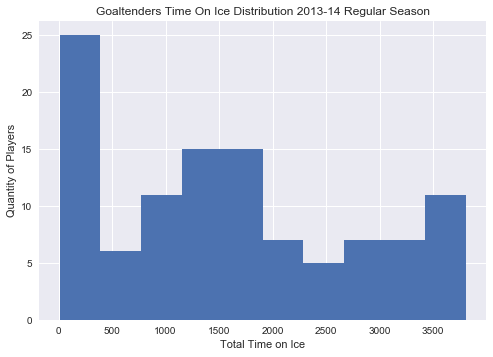

In [63]:
x4 = dglt.TTOI 
plt.title('Goaltenders Time On Ice Distribution 2013-14 Regular Season')
plt.xlabel('Total Time on Ice')
plt.ylabel('Quantity of Players')
#plt.xlim(380,400)
plt.hist(x4)
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_goaltenders_toi.pdf')
plt.show()

- Goaltenders that have played less than 400 minutes for the season are excluded from the cluster analysis. Since game level data is being used, those players will be ranked as bottom goaltenders.

In [64]:
low = dglt.copy()
low = low[low['TTOI'] < 400]
low.shape

(25, 60)

In [65]:
dglt = dglt[dglt['TTOI'] > 400]
dglt.shape

(84, 60)

In [66]:
#dglt.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/total_stats_goaltenders_nhl_positions.csv', index='False', sep=',')
#dglt.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/total_stats_goaltenders_nhl_positions.csv', index='False', sep=',')

## clusters for goaltenders

In [67]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
g = dglt[['TSaveShotARatio', 'TShotGoalARatio']]
g_scaled = scaler.fit_transform(g)

### dendrogram

In [68]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [69]:
sn.clustermap(g_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

In [70]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++', max_iter=1000, random_state=1000)
  clusters.fit(g_scaled)
  cluster_errors.append(clusters.inertia_)

In [71]:
clusters_dglt = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dglt[0:10]

,cluster_errors,num_clusters
0,168.000000,1
1,62.696793,2
2,31.536127,3
3,21.242473,4
4,13.292154,5
5,8.031210,6
6,5.414729,7
7,3.925212,8
8,2.958151,9
9,2.402220,10


In [72]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_goaltenders_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dglt.to_latex())
f.write(endtex)
f.close()

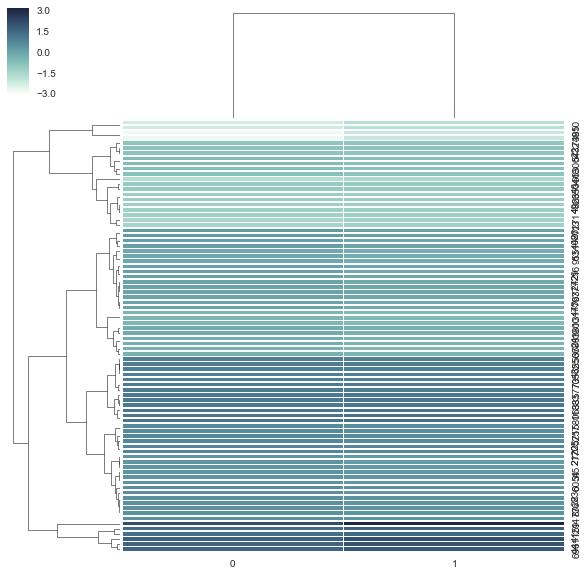

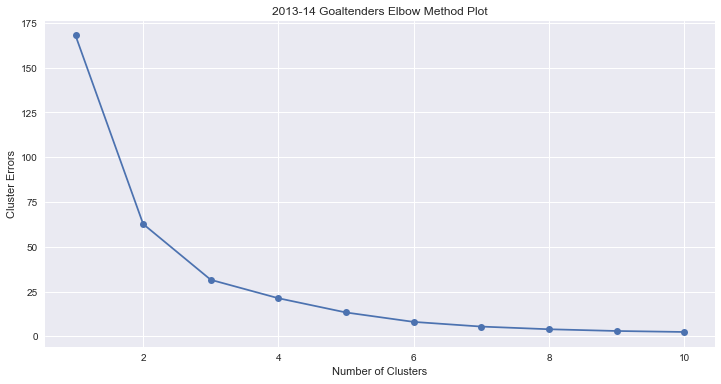

In [73]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dglt.num_clusters, clusters_dglt.cluster_errors, marker = "o" )
plt.title('2013-14 Goaltenders Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_goaltenders_eblow_plot.pdf')
plt.show()

### silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.551820025783
For n_clusters = 3 The average silhouette_score is : 0.53553137872
For n_clusters = 4 The average silhouette_score is : 0.528362588511
For n_clusters = 5 The average silhouette_score is : 0.536506399643
For n_clusters = 6 The average silhouette_score is : 0.579948652054
For n_clusters = 7 The average silhouette_score is : 0.596619242793
For n_clusters = 8 The average silhouette_score is : 0.594456944214
For n_clusters = 9 The average silhouette_score is : 0.599475464276
For n_clusters = 10 The average silhouette_score is : 0.5892776146


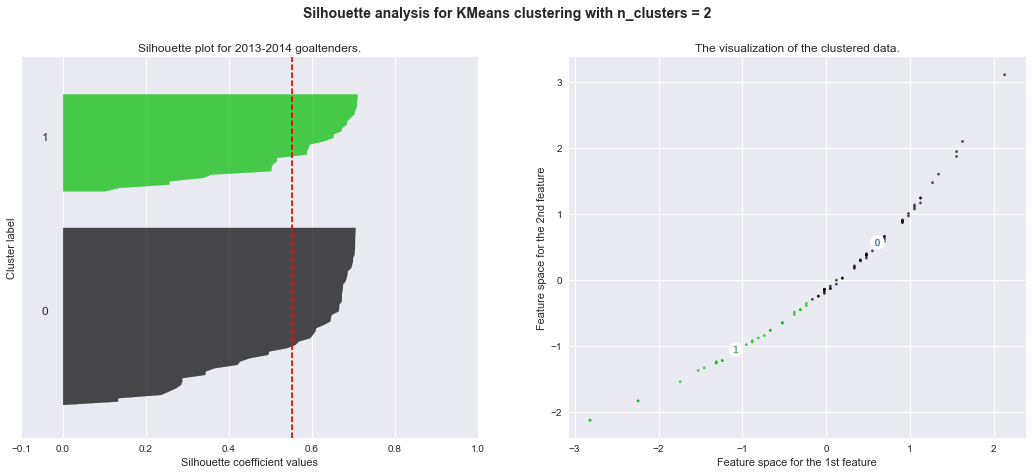

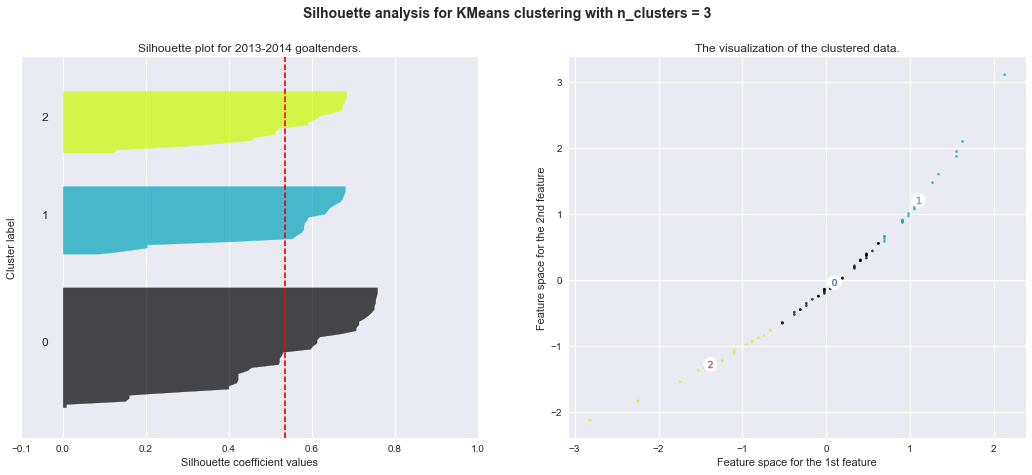

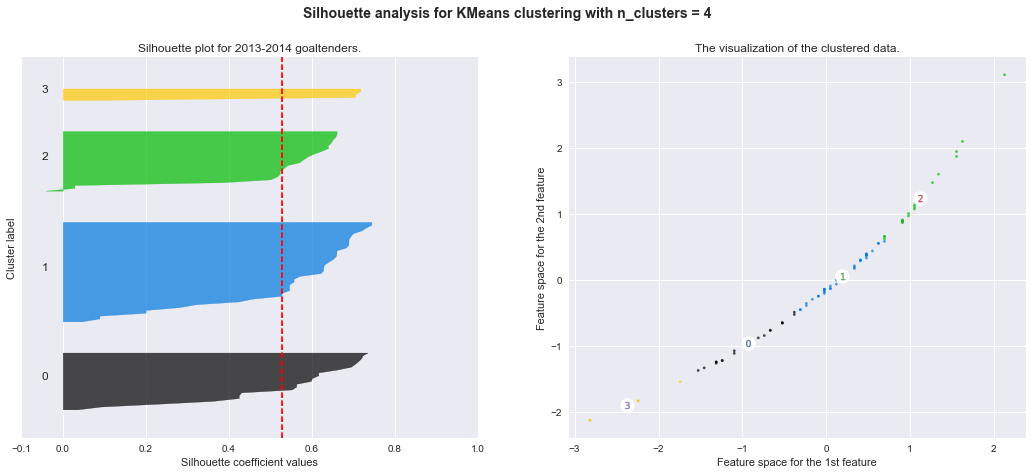

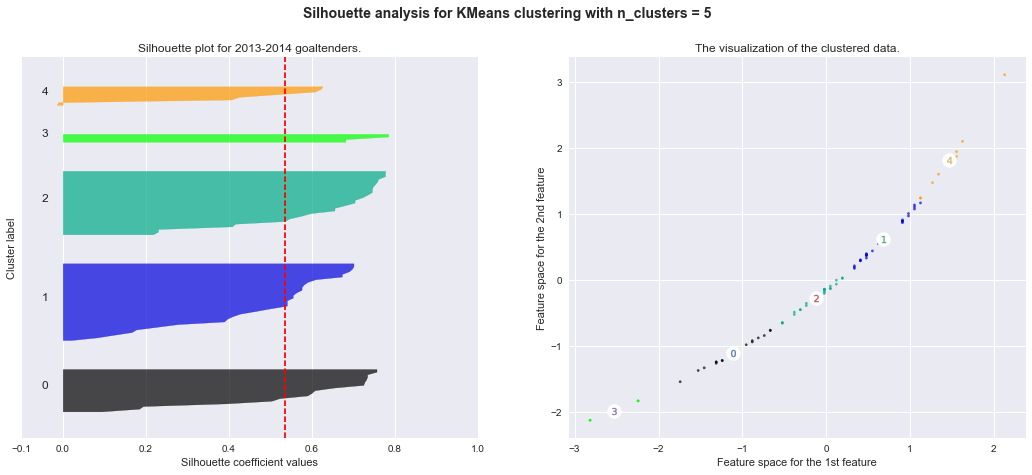

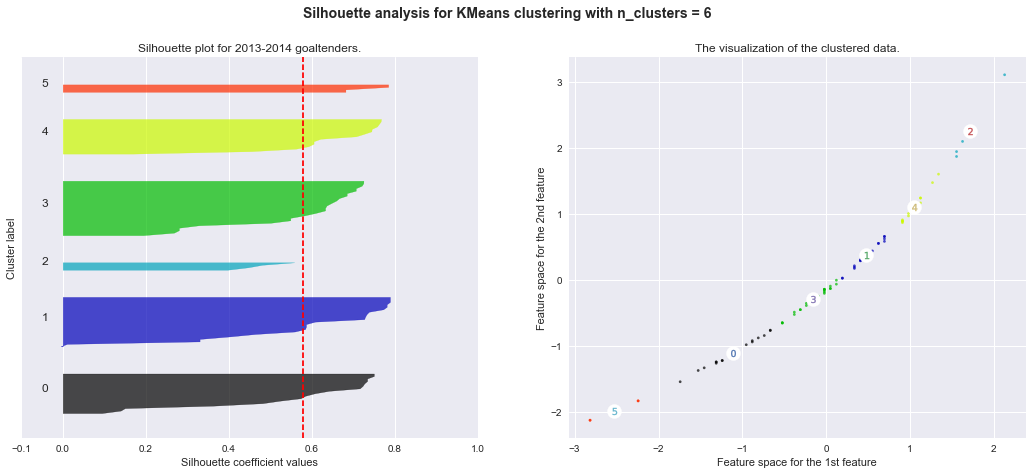

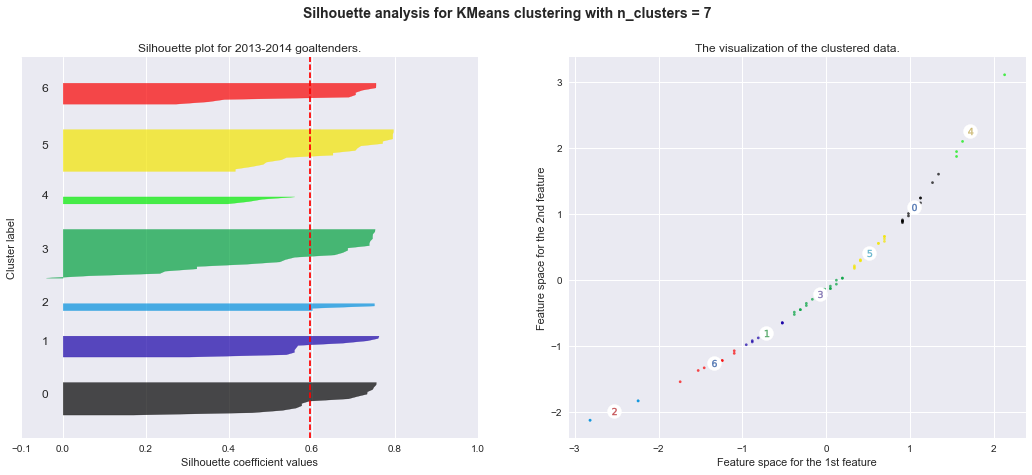

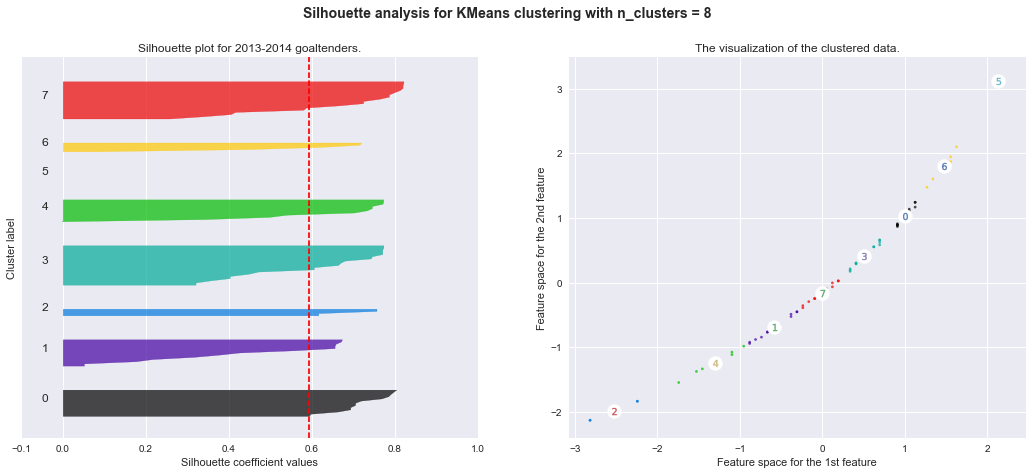

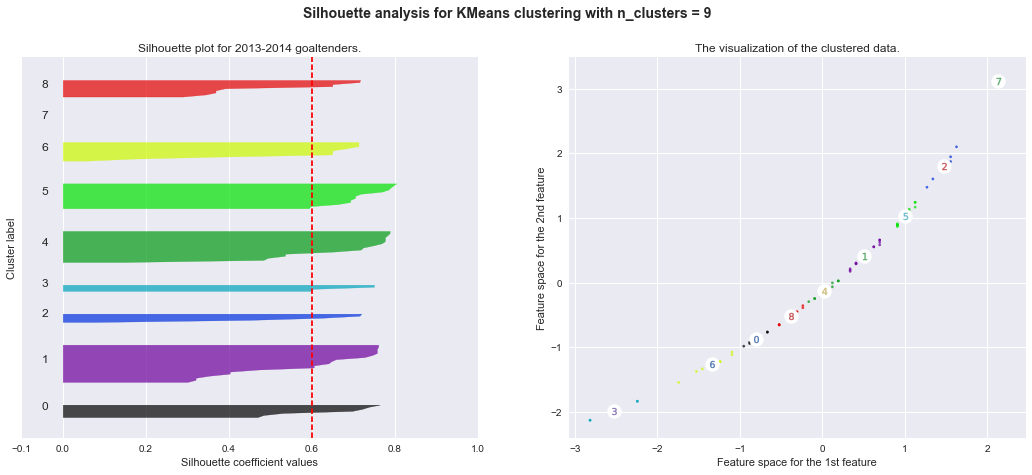

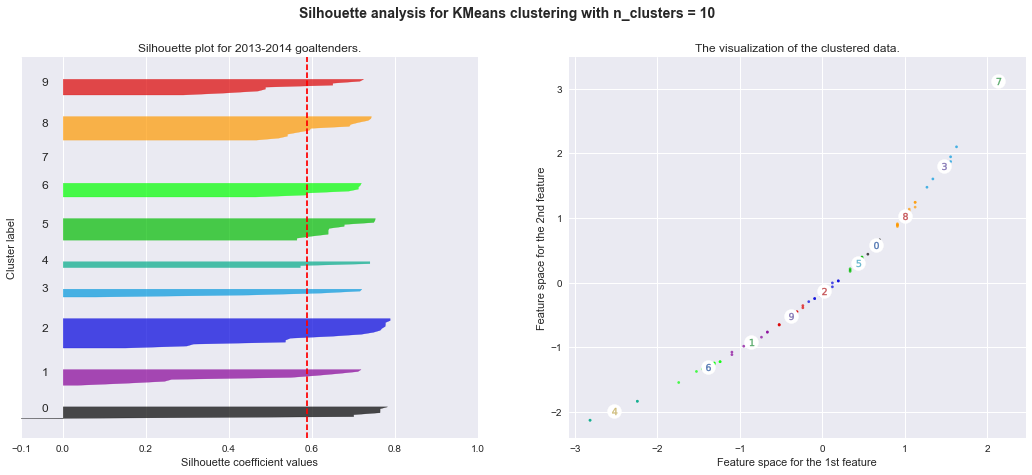

In [74]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(g_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, random_state=1000)
  cluster_labels = clusterer.fit_predict( g_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(g_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(g_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2013-2014 goaltenders.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(g_scaled[:, 0], g_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_goaltenders_silhouette_analysis.pdf')
plt.show()

Silhouette analysis for KMeans clustering of goaltenders shows that the number of clusters with the highest values of the three statistics used, are $n$ = 3, 4, 10. These clusters have an average silhouette score of 0.441, 0.425 and 0.430 respectfully. 
This indicates that the most natural cluster size were within this range. From a hockey perspective, the optimal number of clusters for goaltenders are 3. 
- Top
- Average
- Bottom


In [75]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=1000, random_state=1000)
kmeans.fit(g_scaled)

clusters_dglt = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TSaveShotARatio', 'TShotGoalARatio'])

dglt['cluster']=kmeans.labels_

clusters_dglt

,TSaveShotARatio,TShotGoalARatio
0,0.094261,-0.035967
1,1.099383,1.220649
2,-1.383631,-1.268392


In [76]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_goaltenders_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dglt.to_latex())
f.write(endtex)
f.close()

In [77]:
#clusters_dglt.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/clusters_goaltenders.csv')
#clusters_dglt.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/clusters_goaltenders.csv')

### rank goaltenders

The next step is to rank players based on clusters:

- **Cluster 1** is for **1st** pairing defensemen (Top 2). 
- **Cluster 0** is for **2nd** pairing defensemen (Top 4). 
- **Cluster 2** is for **3rd** pairing defensemen (Bottom 2)

display the number of players per rank

In [78]:
dglt['Rank'] = dglt.apply(lambda x: 1 if (x['cluster'] == 1) else 2 if (x['cluster'] == 0) else 3, axis=1)
dglt = dglt.sort_values(['TSaves'], ascending=[False])
dglt['Rank'].value_counts()

2    40
1    23
3    21
Name: Rank, dtype: int64

In [79]:
g2 = dglt.copy()
g2 = g2[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TSaveShotARatio', 'TShotGoalARatio', 'TEVSaveShotARatio', 'TEVShotGoalARatio',  'TSaves', 'TGoalsA', 'TShotsA', 'TOISaves', 'TOIGoalsA', 'TOIShotsA', 'TPoints', 'TOIPoints']]
g2 = g2[g2['Rank'] == 1]
g2 = g2.sort_values(['TSaveShotARatio', 'TEVShotGoalARatio'], ascending=[False, False])
g2.head(25)

,Rank,TeamCode,PlayerName,TGP,TPoints,TSaveShotARatio,TShotGoalARatio,TEVSaveShotARatio,TEVShotGoalARatio,TSaves,TGoalsA,TShotsA,TOISaves,TOIGoalsA,TOIShotsA,TPoints,TOIPoints
728,1,NYR,CAM TALBOT,21,0.0,0.941,17.031,0.942,17.148,513.0,32.0,545,0.423617,0.026424,0.450041,0.0,0.000000
747,1,S.J,ALEX STALOCK,24,0.0,0.934,15.250,0.934,15.121,513.0,36.0,549,0.409744,0.028754,0.438498,0.0,0.000000
846,1,L.A,MARTIN JONES,19,1.0,0.933,14.848,0.949,19.450,457.0,33.0,490,0.417352,0.030137,0.447489,1.0,0.000913
623,1,MIN,JOSH HARDING,29,0.0,0.933,14.978,0.942,17.273,629.0,45.0,674,0.377098,0.026978,0.404077,0.0,0.000000
215,1,BOS,TUUKKA RASK,58,2.0,0.930,14.375,0.942,17.190,1498.0,112.0,1610,0.442410,0.033077,0.475487,2.0,0.000591
607,1,CAR,ANTON KHUDOBIN,36,0.0,0.929,14.149,0.934,15.246,973.0,74.0,1047,0.466891,0.035509,0.502399,0.0,0.000000
5,1,MTL,CAREY PRICE,59,2.0,0.927,13.736,0.934,15.206,1643.0,129.0,1772,0.474307,0.037240,0.511547,2.0,0.000577
196,1,COL,SEMYON VARLAMOV,63,3.0,0.927,13.607,0.933,14.875,1828.0,145.0,1973,0.504972,0.040055,0.545028,3.0,0.000829
724,1,BOS,CHAD JOHNSON,27,0.0,0.927,13.740,0.932,14.615,637.0,50.0,687,0.421575,0.033091,0.454666,0.0,0.000000
595,1,T.B,BEN BISHOP,63,2.0,0.926,13.551,0.933,14.842,1594.0,127.0,1721,0.444506,0.035416,0.479922,2.0,0.000558


# combine center, winger, defenseman and goaltender dataframes

In [80]:
dataframes = [dc, dw, dwd,dglt]
#dataframes = [dww, dwd]
dr = pd.concat(dataframes)
dr = dr.sort_values(['Position', 'Rank'], ascending=[True, True])
dr.head()

,PlayerName,Position,Rank,Season,TAssists,TBlocks,TDShots,TEVDShots,TEVGoalsA,TEVGoalsF,TEVSaveShotARatio,TEVSaves,TEVShotGoalARatio,TEVShotsA,TEVShotsF,TGP,TGiveaways,TGoals,TGoalsA,TGoalsF,THits,TMisses,TOIAssists,TOIBlocks,TOIDShots,TOIEVDShots,TOIEVGoalsA,TOIEVGoalsF,TOIEVSaveShotARatio,TOIEVSaves,TOIEVShotGoalARatio,TOIEVShotsA,TOIEVShotsF,TOIGiveaways,TOIGoals,TOIGoalsA,TOIGoalsF,TOIHits,TOIMisses,TOIPenalties,TOIPlus/Minus,TOIPoints,TOISaveShotARatio,TOISaves,TOIShotGoalARatio,TOIShots,TOIShotsA,TOIShotsF,TOITakeaways,TPenalties,TPlus/Minus,TPoints,TSaveShotARatio,TSaves,TShotGoalARatio,TShots,TShotsA,TShotsF,TTOI,TTakeaways,TeamCode,cluster
267,SIDNEY CROSBY,C,1,2013,68.0,27.0,433,77,60.0,77.0,NaN,NaN,NaN,664,741,80,56.0,36.0,62.0,133.0,47.0,85.0,0.038680,0.015358,0.246303,0.043800,0.034130,0.043800,NaN,NaN,NaN,0.377702,0.421502,0.031854,0.020478,0.035267,0.075654,0.026735,0.048350,0.026166,0.009670,0.059158,NaN,NaN,NaN,0.127418,0.397611,0.643914,0.023322,46.0,17.0,104.0,NaN,NaN,NaN,224.0,699,1132,1758.0,41.0,PIT,2
178,RYAN GETZLAF,C,1,2013,56.0,87.0,173,58,46.0,76.0,NaN,NaN,NaN,556,614,77,76.0,31.0,60.0,107.0,110.0,83.0,0.034167,0.053081,0.105552,0.035387,0.028066,0.046370,NaN,NaN,NaN,0.339231,0.374619,0.046370,0.018914,0.036608,0.065284,0.067114,0.050641,0.017694,0.018304,0.053081,NaN,NaN,NaN,0.106162,0.423429,0.528981,0.032337,29.0,30.0,87.0,NaN,NaN,NaN,174.0,694,867,1639.0,53.0,ANA,2
115,CLAUDE GIROUX,C,1,2013,58.0,45.0,272,5,57.0,65.0,NaN,NaN,NaN,691,696,82,34.0,28.0,67.0,110.0,90.0,88.0,0.034606,0.026850,0.162291,0.002983,0.034010,0.038783,NaN,NaN,NaN,0.412291,0.415274,0.020286,0.016706,0.039976,0.065632,0.053699,0.052506,0.027446,0.004773,0.051313,NaN,NaN,NaN,0.116348,0.442124,0.604415,0.025656,46.0,8.0,86.0,NaN,NaN,NaN,195.0,741,1013,1676.0,43.0,PHI,2
384,TYLER SEGUIN,C,1,2013,47.0,23.0,319,17,50.0,71.0,NaN,NaN,NaN,663,680,80,60.0,37.0,50.0,104.0,48.0,123.0,0.030362,0.014858,0.206072,0.010982,0.032300,0.045866,NaN,NaN,NaN,0.428295,0.439276,0.038760,0.023902,0.032300,0.067183,0.031008,0.079457,0.011628,0.013566,0.054264,NaN,NaN,NaN,0.166021,0.430879,0.636951,0.043282,18.0,21.0,84.0,NaN,NaN,NaN,257.0,667,986,1548.0,67.0,DAL,2
63,NICKLAS BACKSTROM,C,1,2013,61.0,54.0,150,-115,66.0,49.0,NaN,NaN,NaN,734,619,82,24.0,18.0,76.0,103.0,89.0,74.0,0.037562,0.033251,0.092365,-0.070813,0.040640,0.030172,NaN,NaN,NaN,0.451970,0.381158,0.014778,0.011084,0.046798,0.063424,0.054803,0.045567,0.033251,-0.010468,0.048645,NaN,NaN,NaN,0.108990,0.504926,0.597291,0.033251,54.0,-17.0,79.0,NaN,NaN,NaN,177.0,820,970,1624.0,54.0,WSH,2


In [81]:
dr['Rank'].value_counts()

2    326
3    243
1    218
4     37
Name: Rank, dtype: int64

In [82]:
dr.shape

(824, 62)

- create and save new dataframe that contains season, team code, player number, player name, position and rank columns.

In [83]:
drs = dr[['Season', 'TeamCode', 'PlayerName', 'Position', 'Rank']]

In [84]:
drs.shape

(824, 5)

In [85]:
drs.head()

,Season,TeamCode,PlayerName,Position,Rank
267,2013,PIT,SIDNEY CROSBY,C,1
178,2013,ANA,RYAN GETZLAF,C,1
115,2013,PHI,CLAUDE GIROUX,C,1
384,2013,DAL,TYLER SEGUIN,C,1
63,2013,WSH,NICKLAS BACKSTROM,C,1


In [86]:
drs.isnull().sum()

Season        0
TeamCode      0
PlayerName    0
Position      0
Rank          0
dtype: int64

unclustered forwards will be added to the bottom line (4th) per position. Unclustered defensemen and goaltenders will be added to bottom defensive paring and bottom goaltender respectfully.

In [87]:
drs.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2013_player_rank.csv')
#dr.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/2013_player_rank.csv')